AEDA PROJEKT

Rozdíly mezi skupinami (PD, RBD, HC):

        o H0: Neexistují významné rozdíly v parametrech očních pohybů mezi skupinami
PD, RBD a HC.

        o H1: Existují významné rozdíly v parametrech očních pohybů mezi skupinami
PD, RBD a HC.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# 1. Načítanie dát
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import shapiro, levene, f_oneway, kruskal
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from scikit_posthocs import posthoc_dunn

# 1. Načítanie dát
# data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku

##############################
#   ZÁKLADNÍ KLINICKÁ DATA   #
##############################


==== Analýza pre parameter: Věk ====
Shapiro-Wilk test normálnosti:
  PD: p=4.2039e-01
  RBD: p=7.7835e-03
Levene test homogenity variancií: Stat=1.3506, p=2.4942e-01
Mann-Whitney U test: Stat=428.5000, p=2.1329e-01
Prijímame H₀: Medzi skupinami nie je štatisticky významný rozdiel.


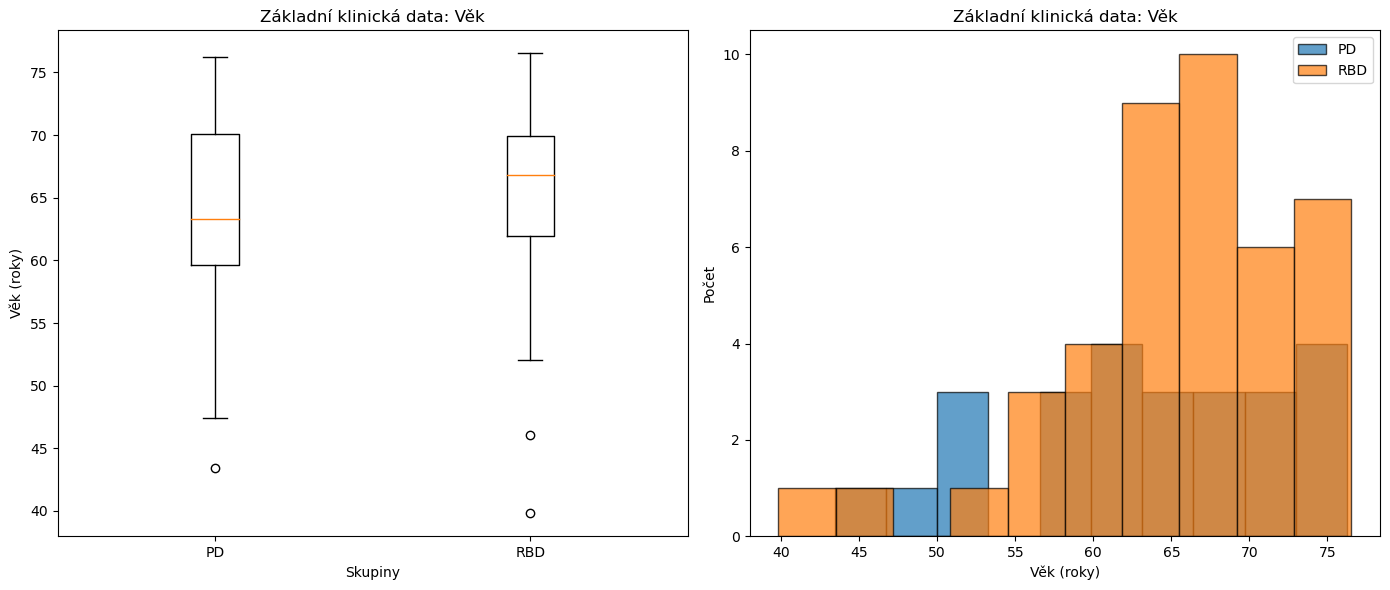


==== Analýza pre parameter: MoCA ====
Shapiro-Wilk test normálnosti:
  PD: p=6.7924e-01
  RBD: p=6.0636e-01
Levene test homogenity variancií: Stat=0.6609, p=4.1922e-01
T-test: Stat=-0.6041, p=5.4786e-01
Prijímame H₀: Medzi skupinami nie je štatisticky významný rozdiel.


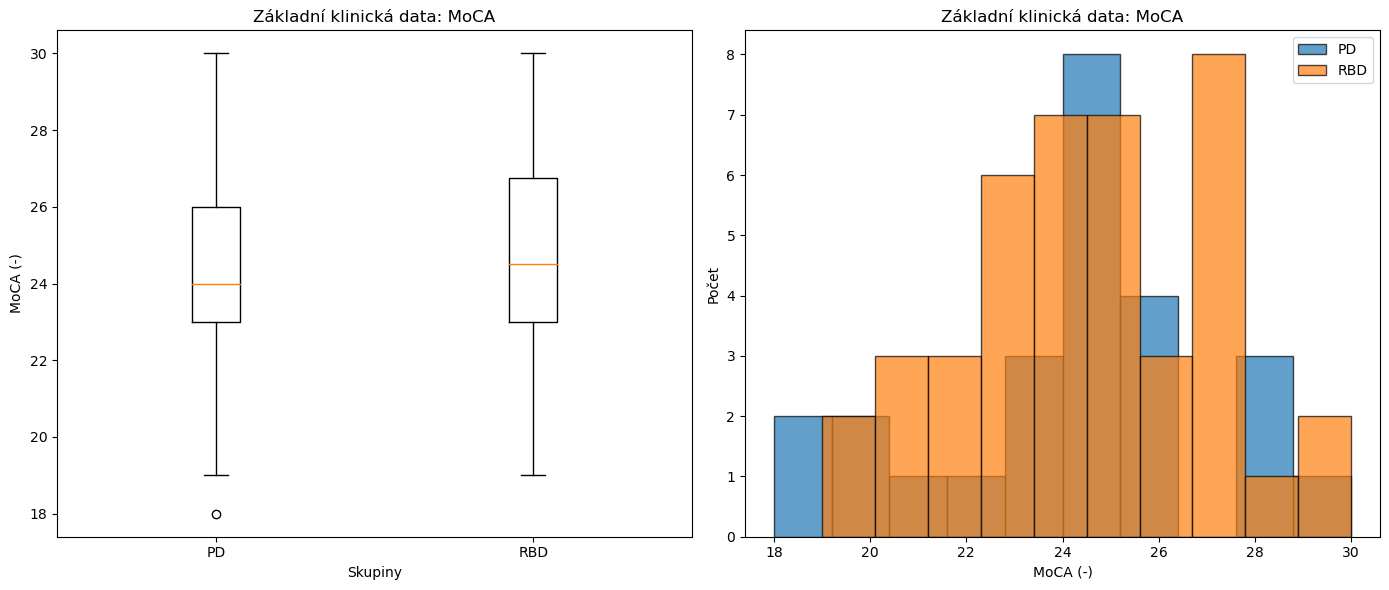


==== Analýza pre parameter: UPDRS III ====
Shapiro-Wilk test normálnosti:
  PD: p=1.9369e-01
  RBD: p=1.0415e-04
Levene test homogenity variancií: Stat=36.0912, p=9.3966e-08
Mann-Whitney U test: Stat=880.5000, p=3.8671e-06
Zamietame H₀: Medzi skupinami je štatisticky významný rozdiel.


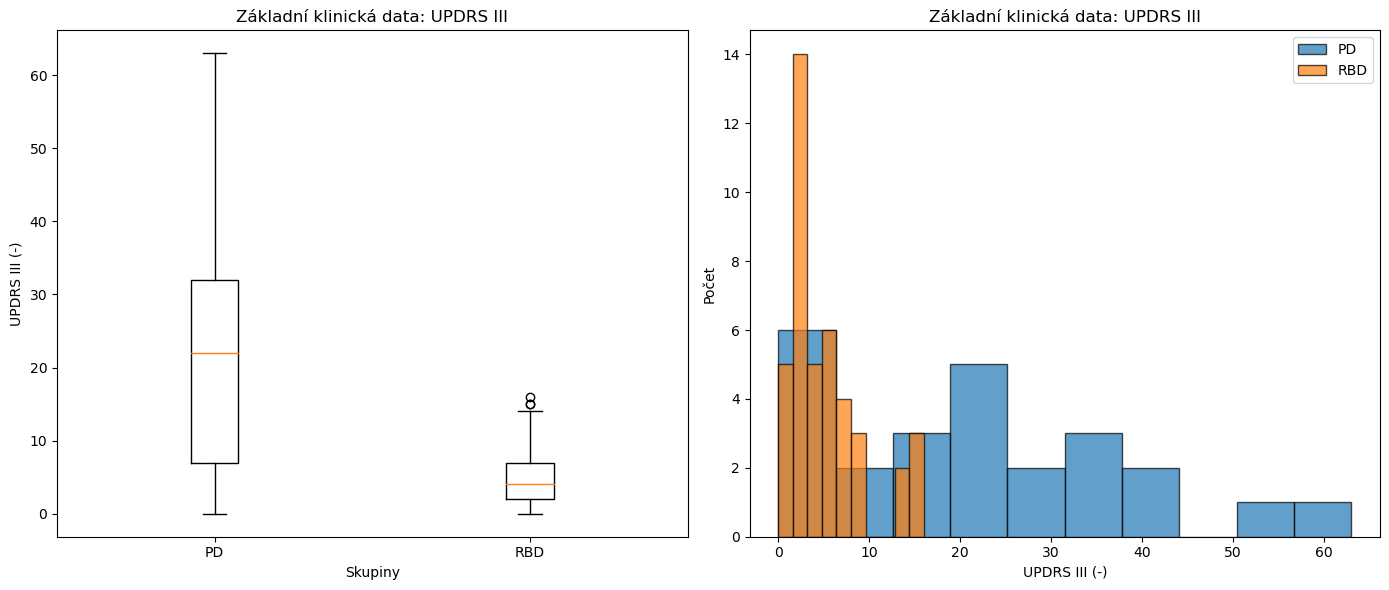

In [92]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# 1. Načítanie dát
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku

# Výber relevantných riadkov (5-77) a stĺpcov (2-4)
data = data.iloc[4:77, 1:4]  # Riadky 5–77, stĺpce 2–4
data.columns = ['Věk', 'MoCA', 'UPDRS III']  # Pre čitateľnosť pridáme názvy stĺpcov

# Kontrola a konverzia na číselné hodnoty
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Konverzia na čísla, NaN pre neplatné hodnoty

# Odstránenie riadkov s NaN hodnotami
data = data.dropna()

# Rozdelenie na skupiny podľa riadkov
group_PD = data.iloc[:25]  # Riadky 5–29 (indexy 0–24) sú PD
group_RBD = data.iloc[25:]  # Riadky 30–77 (indexy 25–72) sú RBD

# Funkcia na vykonanie testov a vizualizácie
def analyze_param(param_name):
    print(f"\n==== Analýza pre parameter: {param_name} ====")
    
    values_PD = group_PD[param_name]
    values_RBD = group_RBD[param_name]
    
    # Test normálnosti
    p_PD = shapiro(values_PD)[1]
    p_RBD = shapiro(values_RBD)[1]
    print(f"Shapiro-Wilk test normálnosti:")
    print(f"  PD: p={p_PD:.4e}")
    print(f"  RBD: p={p_RBD:.4e}")
    
    # Test homogenity variancií
    stat_homogeneity, p_homogeneity = levene(values_PD, values_RBD)
    print(f"Levene test homogenity variancií: Stat={stat_homogeneity:.4f}, p={p_homogeneity:.4e}")
    
    # Výber testu
    if p_PD > 0.05 and p_RBD > 0.05:
        # Parametrický test (t-test)
        t_stat, t_p = ttest_ind(values_PD, values_RBD, equal_var=(p_homogeneity > 0.05))
        print(f"T-test: Stat={t_stat:.4f}, p={t_p:.4e}")
        if t_p < 0.05:
            print("Zamietame H₀: Medzi skupinami je štatisticky významný rozdiel.")
        else:
            print("Prijímame H₀: Medzi skupinami nie je štatisticky významný rozdiel.")
    else:
        # Neparametrický test (Mann-Whitney U test)
        mw_stat, mw_p = mannwhitneyu(values_PD, values_RBD, alternative='two-sided')
        print(f"Mann-Whitney U test: Stat={mw_stat:.4f}, p={mw_p:.4e}")
        if mw_p < 0.05:
            print("Zamietame H₀: Medzi skupinami je štatisticky významný rozdiel.")
        else:
            print("Prijímame H₀: Medzi skupinami nie je štatisticky významný rozdiel.")

    units = {'Věk': 'roky', 
             'MoCA': '-',
             'UPDRS III': '-'}
    
    # Vizualizácia
    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot([values_PD, values_RBD], labels=['PD', 'RBD'])
    plt.title(f"Základní klinická data: {param_name}")
    plt.xlabel("Skupiny") 
    plt.ylabel(f"{param_name} ({units[param_name]})")
    
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(values_PD, bins=10, alpha=0.7, label='PD', edgecolor='k')
    plt.hist(values_RBD, bins=10, alpha=0.7, label='RBD', edgecolor='k')
    plt.title(f"Základní klinická data: {param_name}")
    plt.xlabel(f"{param_name} ({units[param_name]})") 
    plt.ylabel("Počet")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Analyzujeme každý parameter
for param in ['Věk', 'MoCA', 'UPDRS III']:
    analyze_param(param)


##############################
#   HORIZONTÁLNÍ ANTISAKÁDY  #
##############################


==== Vizualizácia ====

Vizualizácia pre parameter: Reakční čas


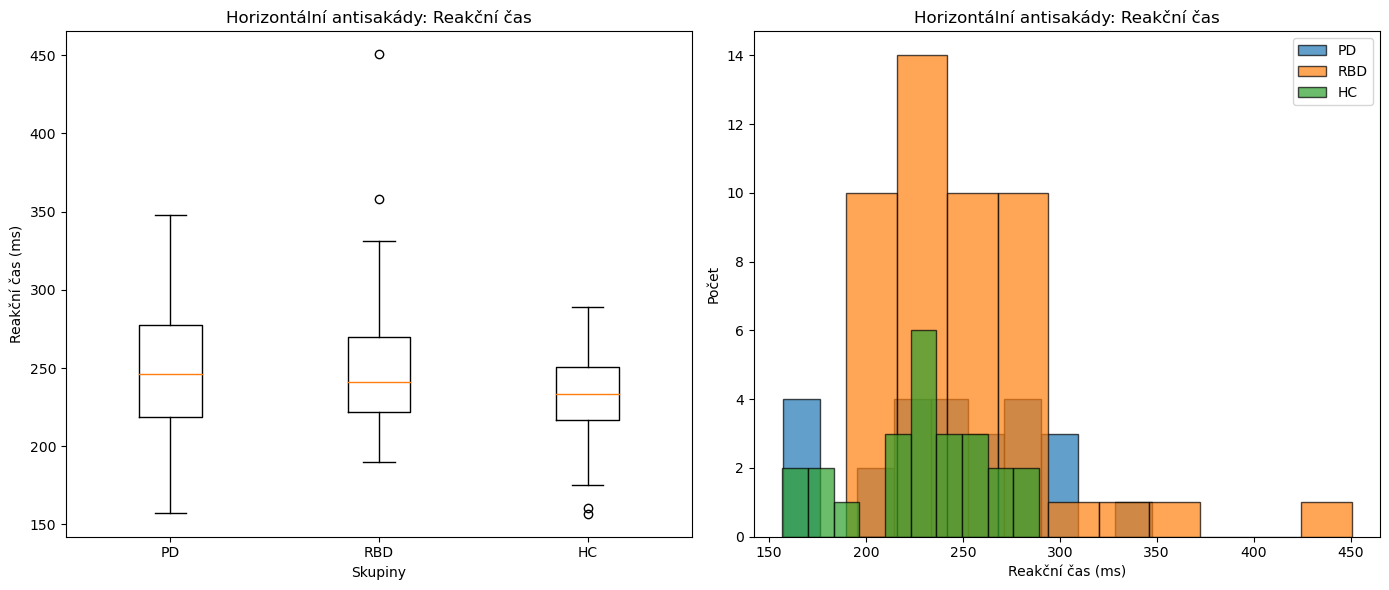


Vizualizácia pre parameter: Chyba


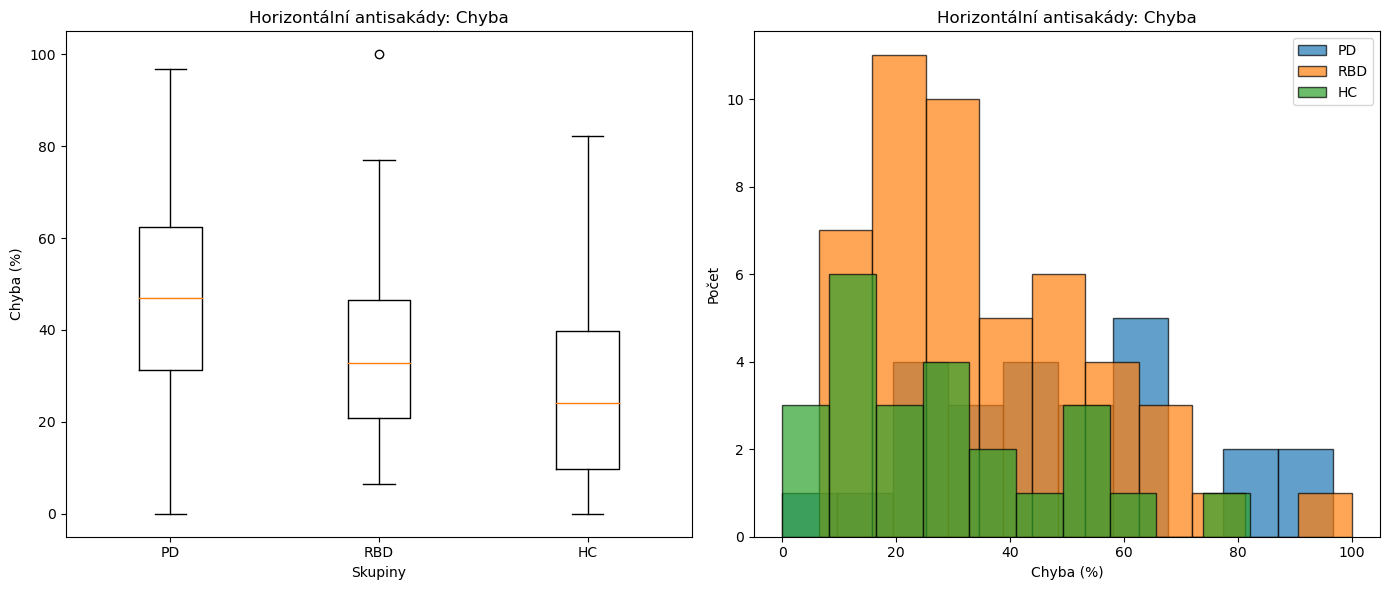


==== Testy pre parameter: Reakční čas ====
Shapiro-Wilk test normálnosti:
  PD: p=7.9719e-01
  RBD: p=9.8311e-06
  HC: p=3.4983e-01
Levene test homogenity variancií: Stat=1.0264, p=3.6228e-01
Kruskal-Wallis: Stat=2.5519, p=2.7916e-01

==== Testy pre parameter: Chyba ====
Shapiro-Wilk test normálnosti:
  PD: p=9.5786e-01
  RBD: p=2.5662e-02
  HC: p=1.0359e-01
Levene test homogenity variancií: Stat=0.7831, p=4.5996e-01
Kruskal-Wallis: Stat=9.4284, p=8.9669e-03

Post-hoc test (Dunnov test):
           HC        PD       RBD
HC   1.000000  0.006692  0.360096
PD   0.006692  1.000000  0.147567
RBD  0.360096  0.147567  1.000000


In [93]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Načítanie údajov zo súboru
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku

# Výber relevantných riadkov (5-102) a stĺpcov (1, 5, 6)
data = data.iloc[4:102, [0, 4, 5]]  # Stĺpec 1 je Skupina, 5 = Reakční čas, 6 = Chyba
data.columns = ['Skupina', 'Reakční čas', 'Chyba']  # Pre lepšiu čitateľnosť

# Kontrola a konverzia číselných hodnôt
for col in ['Reakční čas', 'Chyba']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Konverzia na čísla, NaN pre neplatné hodnoty

# Odstránenie riadkov s NaN hodnotami
data = data.dropna()

# Rozdelenie údajov na skupiny podľa riadkov
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28) sú PD
data.loc[29:76, 'Skupina'] = 'RBD' # Riadky 30–77 (indexy 29–76) sú RBD
data.loc[77:101, 'Skupina'] = 'HC' # Riadky 78–102 (indexy 77–101) sú HC

# Skupiny pre ďalšie analýzy
group_PD = data[data['Skupina'] == 'PD']
group_RBD = data[data['Skupina'] == 'RBD']
group_HC = data[data['Skupina'] == 'HC']

# Vizualizácia (Boxploty a histogramy)
print("\n==== Vizualizácia ====")
for col in ['Reakční čas', 'Chyba']:

    units = {'Reakční čas': 'ms', 
             'Chyba': '%'}
    
    print(f"\nVizualizácia pre parameter: {col}")

    # Hodnoty pre skupiny
    values_PD = group_PD[col].dropna()
    values_RBD = group_RBD[col].dropna()
    values_HC = group_HC[col].dropna()

    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot([values_PD, values_RBD, values_HC], labels=['PD', 'RBD', 'HC'])
    plt.title(f"Horizontální antisakády: {col}")
    plt.xlabel("Skupiny") 
    plt.ylabel(f"{col} ({units[col]})")

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(values_PD, bins=10, alpha=0.7, label='PD', edgecolor='k')
    plt.hist(values_RBD, bins=10, alpha=0.7, label='RBD', edgecolor='k')
    plt.hist(values_HC, bins=10, alpha=0.7, label='HC', edgecolor='k')
    plt.title(f"Horizontální antisakády: {col}")
    plt.xlabel(f"{col} ({units[col]})") 
    plt.ylabel("Počet")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overenie normality a homogenity variancií
for col in ['Reakční čas', 'Chyba']:
    print(f"\n==== Testy pre parameter: {col} ====")
    
    # Test normálnosti
    p_PD = shapiro(group_PD[col])[1]
    p_RBD = shapiro(group_RBD[col])[1]
    p_HC = shapiro(group_HC[col])[1]
    print(f"Shapiro-Wilk test normálnosti:")
    print(f"  PD: p={p_PD:.4e}")
    print(f"  RBD: p={p_RBD:.4e}")
    print(f"  HC: p={p_HC:.4e}")
    
    # Test homogenity variancií
    stat_homogeneity, p_homogeneity = levene(
        group_PD[col], group_RBD[col], group_HC[col]
    )
    print(f"Levene test homogenity variancií: Stat={stat_homogeneity:.4f}, p={p_homogeneity:.4e}")

    # Výber testu
    if p_PD > 0.05 and p_RBD > 0.05 and p_HC > 0.05 and p_homogeneity > 0.05:
        # Parametrický test (ANOVA)
        anova_stat, anova_p = f_oneway(group_PD[col], group_RBD[col], group_HC[col])
        print(f"ANOVA: Stat={anova_stat:.4f}, p={anova_p:.4e}")
        
        if anova_p < 0.05:
            # Post-hoc test (Tukey HSD)
            tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'])
            print("\nPost-hoc test (Tukey HSD):")
            print(tukey)
    else:
        # Neparametrický test (Kruskal-Wallis)
        kruskal_stat, kruskal_p = kruskal(
            group_PD[col], group_RBD[col], group_HC[col]
        )
        print(f"Kruskal-Wallis: Stat={kruskal_stat:.4f}, p={kruskal_p:.4e}")
        
        if kruskal_p < 0.05:
            # Post-hoc test (Dunnov test)
            dunn = posthoc_dunn(data, val_col=col, group_col='Skupina', p_adjust='bonferroni')
            print("\nPost-hoc test (Dunnov test):")
            print(dunn)



##############################
#   VERTIKÁLNÍ ANTISAKÁDY  #
##############################


==== Vizualizácia ====

Vizualizácia pre parameter: Reakční čas


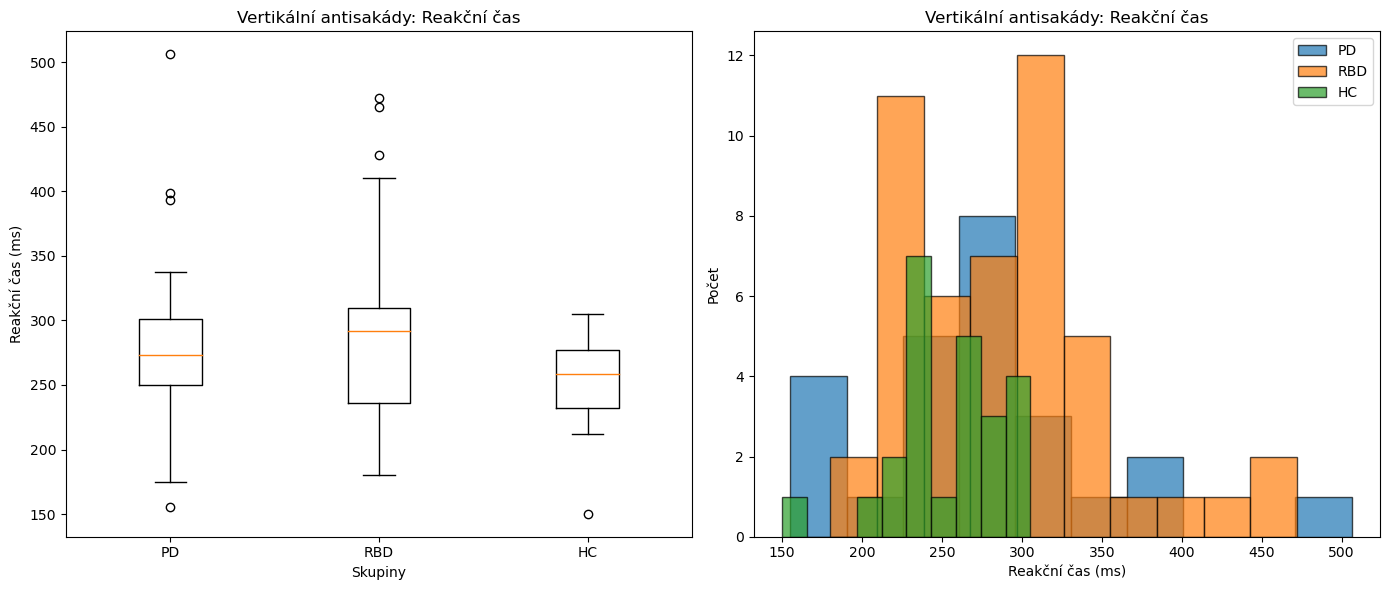


Vizualizácia pre parameter: Chyba


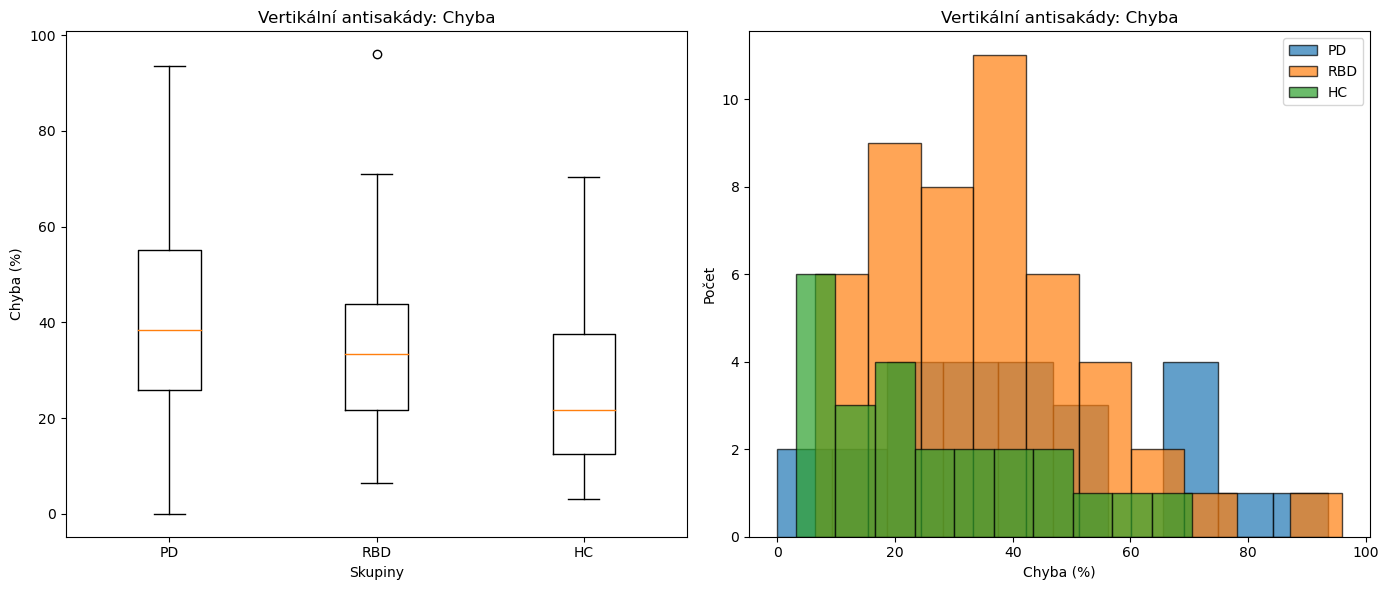


==== Testy pre parameter: Reakční čas ====
Shapiro-Wilk test normálnosti:
  PD: p=3.8097e-02
  RBD: p=3.1173e-03
  HC: p=9.6355e-02
Levene test homogenity variancií: Stat=2.2184, p=1.1445e-01
Kruskal-Wallis: Stat=6.0125, p=4.9476e-02

Post-hoc test (Dunnov test):
           HC        PD       RBD
HC   1.000000  0.493975  0.042673
PD   0.493975  1.000000  1.000000
RBD  0.042673  1.000000  1.000000

==== Testy pre parameter: Chyba ====
Shapiro-Wilk test normálnosti:
  PD: p=8.3788e-01
  RBD: p=4.0123e-02
  HC: p=4.7044e-02
Levene test homogenity variancií: Stat=1.2508, p=2.9100e-01
Kruskal-Wallis: Stat=7.0197, p=2.9902e-02

Post-hoc test (Dunnov test):
           HC        PD       RBD
HC   1.000000  0.027457  0.169601
PD   0.027457  1.000000  0.831170
RBD  0.169601  0.831170  1.000000


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Načítanie údajov zo súboru
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku

data = data.iloc[4:102, [0, 6, 7]]  # Stĺpec 1 je Skupina, 7 = Reakční čas, 8 = Chyba
data.columns = ['Skupina', 'Reakční čas', 'Chyba']  # Pre lepšiu čitateľnosť

# Kontrola a konverzia číselných hodnôt
for col in ['Reakční čas', 'Chyba']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Konverzia na čísla, NaN pre neplatné hodnoty

# Odstránenie riadkov s NaN hodnotami
data = data.dropna()

# Rozdelenie údajov na skupiny podľa riadkov
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28) sú PD
data.loc[29:76, 'Skupina'] = 'RBD' # Riadky 30–77 (indexy 29–76) sú RBD
data.loc[77:101, 'Skupina'] = 'HC' # Riadky 78–102 (indexy 77–101) sú HC

# Skupiny pre ďalšie analýzy
group_PD = data[data['Skupina'] == 'PD']
group_RBD = data[data['Skupina'] == 'RBD']
group_HC = data[data['Skupina'] == 'HC']

# Vizualizácia (Boxploty a histogramy)
print("\n==== Vizualizácia ====")
for col in ['Reakční čas', 'Chyba']:
    units = {'Reakční čas': 'ms', 'Chyba': '%'}
    
    print(f"\nVizualizácia pre parameter: {col}")

    # Hodnoty pre skupiny
    values_PD = group_PD[col].dropna()
    values_RBD = group_RBD[col].dropna()
    values_HC = group_HC[col].dropna()

    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot([values_PD, values_RBD, values_HC], labels=['PD', 'RBD', 'HC'])
    plt.title(f"Vertikální antisakády: {col}")
    plt.xlabel("Skupiny") 
    plt.ylabel(f"{col} ({units[col]})")

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(values_PD, bins=10, alpha=0.7, label='PD', edgecolor='k')
    plt.hist(values_RBD, bins=10, alpha=0.7, label='RBD', edgecolor='k')
    plt.hist(values_HC, bins=10, alpha=0.7, label='HC', edgecolor='k')
    plt.title(f"Vertikální antisakády: {col}")
    plt.xlabel(f"{col} ({units[col]})") 
    plt.ylabel("Počet")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overenie normality a homogenity variancií
for col in ['Reakční čas', 'Chyba']:
    print(f"\n==== Testy pre parameter: {col} ====")
    
    # Test normálnosti
    p_PD = shapiro(group_PD[col])[1]
    p_RBD = shapiro(group_RBD[col])[1]
    p_HC = shapiro(group_HC[col])[1]
    print(f"Shapiro-Wilk test normálnosti:")
    print(f"  PD: p={p_PD:.4e}")
    print(f"  RBD: p={p_RBD:.4e}")
    print(f"  HC: p={p_HC:.4e}")
    
    # Test homogenity variancií
    stat_homogeneity, p_homogeneity = levene(
        group_PD[col], group_RBD[col], group_HC[col]
    )
    print(f"Levene test homogenity variancií: Stat={stat_homogeneity:.4f}, p={p_homogeneity:.4e}")

    # Výber testu
    if p_PD > 0.05 and p_RBD > 0.05 and p_HC > 0.05 and p_homogeneity > 0.05:
        # Parametrický test (ANOVA)
        anova_stat, anova_p = f_oneway(group_PD[col], group_RBD[col], group_HC[col])
        print(f"ANOVA: Stat={anova_stat:.4f}, p={anova_p:.4e}")
        
        if anova_p < 0.05:
            # Post-hoc test (Tukey HSD)
            tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'])
            print("\nPost-hoc test (Tukey HSD):")
            print(tukey)
    else:
        # Neparametrický test (Kruskal-Wallis)
        kruskal_stat, kruskal_p = kruskal(
            group_PD[col], group_RBD[col], group_HC[col]
        )
        print(f"Kruskal-Wallis: Stat={kruskal_stat:.4f}, p={kruskal_p:.4e}")
        
        if kruskal_p < 0.05:
            # Post-hoc test (Dunnov test)
            dunn = posthoc_dunn(data, val_col=col, group_col='Skupina', p_adjust='bonferroni')
            print("\nPost-hoc test (Dunnov test):")
            print(dunn)



#######################################
#   HORIZONTÁLNÍ PROSAKÁDY - DOPRAVA  #
#######################################


==== Vizualizácia ====

Vizualizácia pre parameter: Reakční čas


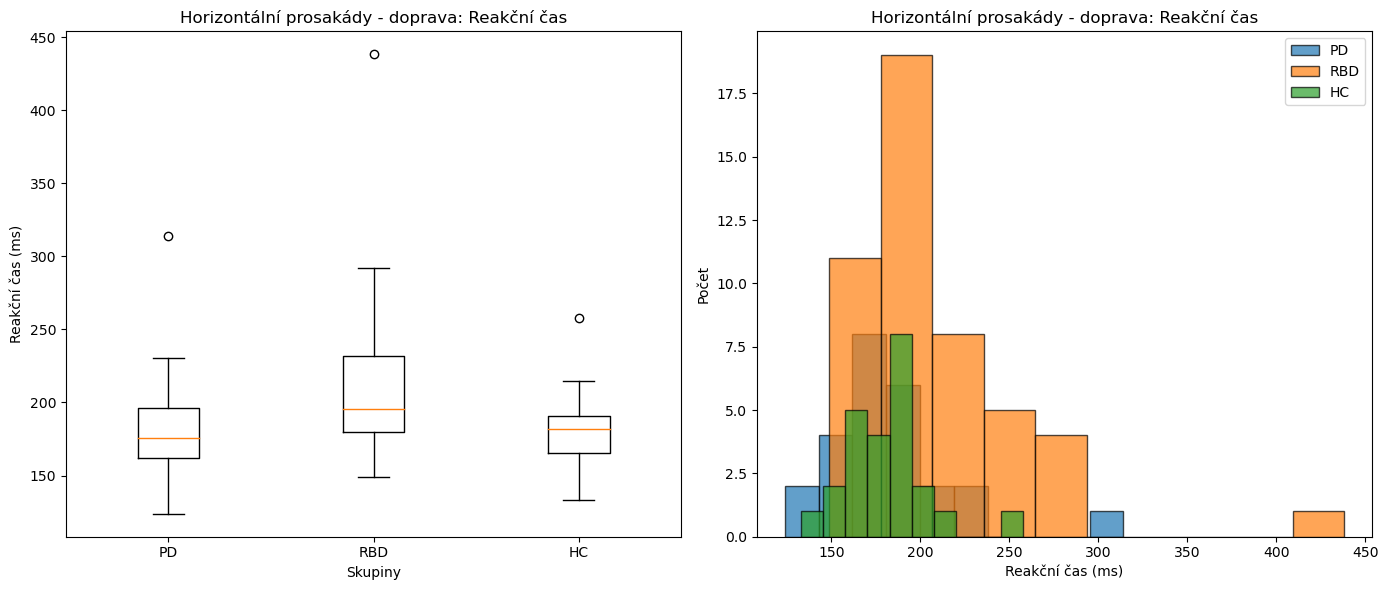


Vizualizácia pre parameter: Průměrná rychlost


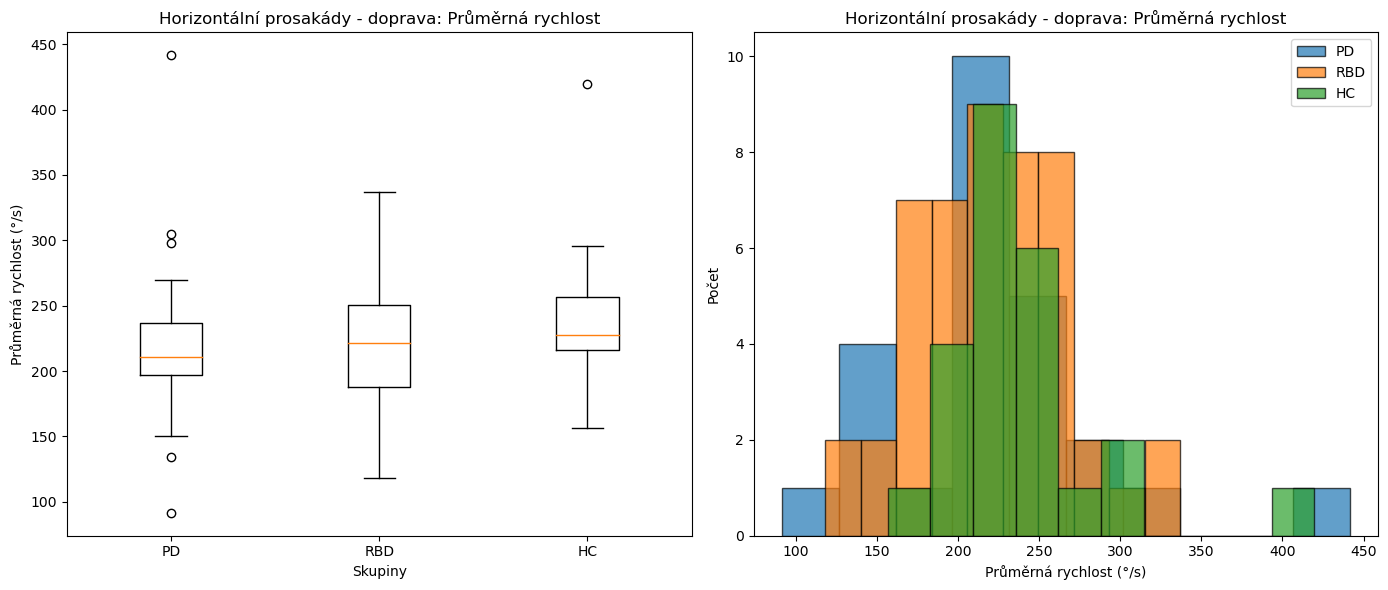


Vizualizácia pre parameter: Maximální rychlost


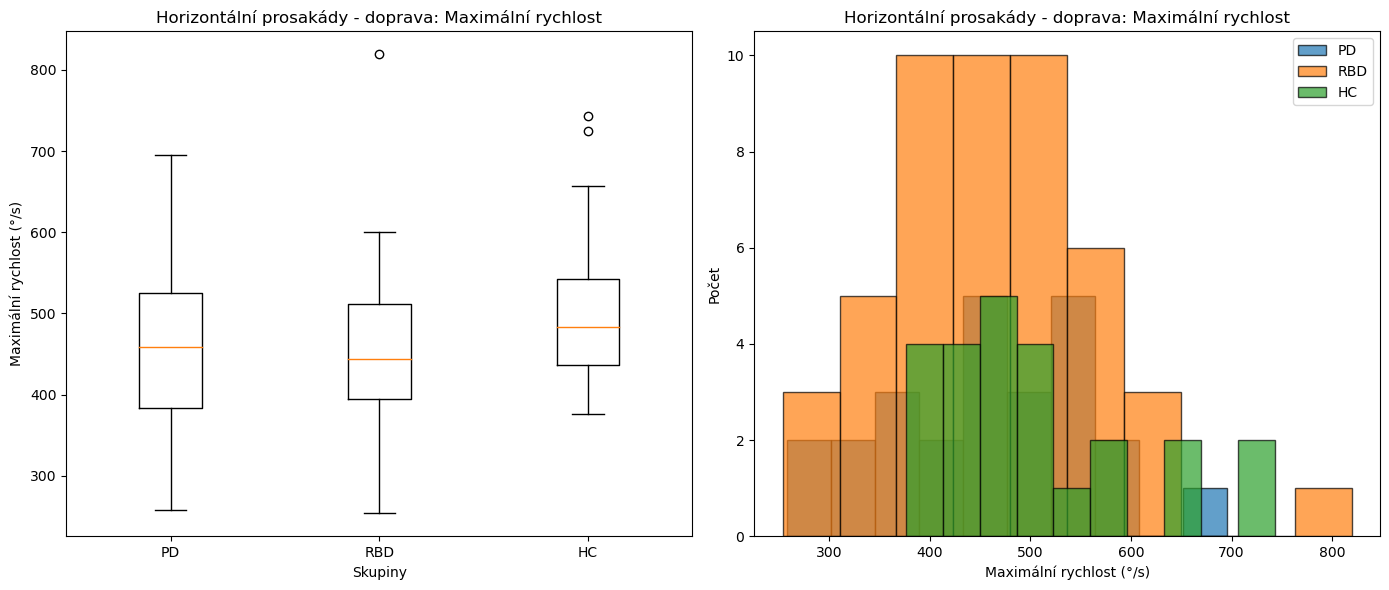


Vizualizácia pre parameter: Zesílení


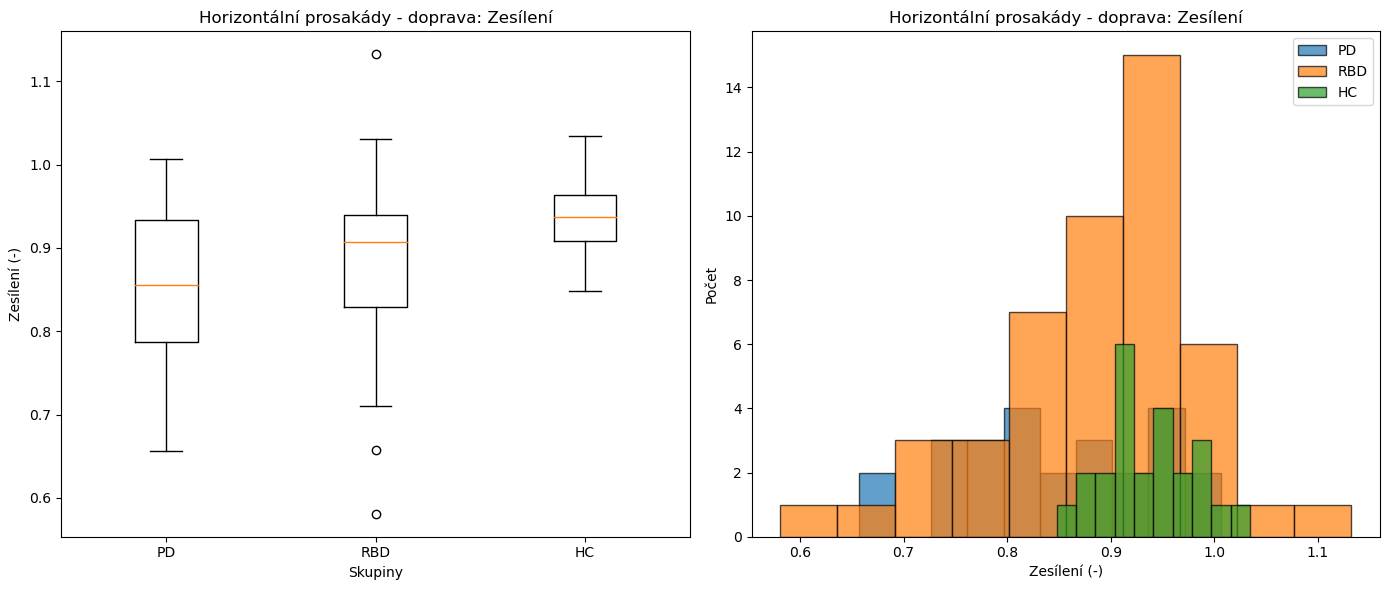


==== Testy pre parameter: Reakční čas ====
Shapiro-Wilk test normálnosti:
  PD: p=5.6404e-03
  RBD: p=8.6393e-07
  HC: p=1.2318e-01
Levene test homogenity variancií: Stat=1.4681, p=2.3559e-01
Kruskal-Wallis: Stat=10.6978, p=4.7535e-03

Post-hoc test (Dunnov test):
          HC        PD       RBD
HC   1.00000  1.000000  0.033360
PD   1.00000  1.000000  0.015401
RBD  0.03336  0.015401  1.000000

==== Testy pre parameter: Průměrná rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=1.1952e-02
  RBD: p=8.7192e-01
  HC: p=1.9617e-03
Levene test homogenity variancií: Stat=0.5015, p=6.0726e-01
Kruskal-Wallis: Stat=2.6555, p=2.6508e-01

==== Testy pre parameter: Maximální rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=9.6098e-01
  RBD: p=8.1067e-02
  HC: p=3.4159e-02
Levene test homogenity variancií: Stat=0.0361, p=9.6456e-01
Kruskal-Wallis: Stat=3.1097, p=2.1122e-01

==== Testy pre parameter: Zesílení ====
Shapiro-Wilk test normálnosti:
  PD: p=5.9297e-01
  RBD: p=1.0601e-01
  HC: p=

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Načítanie údajov zo súboru
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku


data = data.iloc[4:102, [0, 8, 9, 10, 11]]  # Stĺpec 1 je Skupina, 7 = Reakční čas, 8 = Chyba
data.columns = ['Skupina', 'Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']  # Pre lepšiu čitateľnosť

# Kontrola a konverzia číselných hodnôt
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Konverzia na čísla, NaN pre neplatné hodnoty

# Odstránenie riadkov s NaN hodnotami
data = data.dropna()

# Rozdelenie údajov na skupiny podľa riadkov
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28) sú PD
data.loc[29:76, 'Skupina'] = 'RBD' # Riadky 30–77 (indexy 29–76) sú RBD
data.loc[77:101, 'Skupina'] = 'HC' # Riadky 78–102 (indexy 77–101) sú HC

# Skupiny pre ďalšie analýzy
group_PD = data[data['Skupina'] == 'PD']
group_RBD = data[data['Skupina'] == 'RBD']
group_HC = data[data['Skupina'] == 'HC']

# Vizualizácia (Boxploty a histogramy)
print("\n==== Vizualizácia ====")
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:

    units = {'Reakční čas': 'ms', 
             'Průměrná rychlost': '°/s',
             'Maximální rychlost': '°/s',
             'Zesílení': '-'}
    
    print(f"\nVizualizácia pre parameter: {col}")

    # Hodnoty pre skupiny
    values_PD = group_PD[col].dropna()
    values_RBD = group_RBD[col].dropna()
    values_HC = group_HC[col].dropna()

    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot([values_PD, values_RBD, values_HC], labels=['PD', 'RBD', 'HC'])
    plt.title(f"Horizontální prosakády - doprava: {col}")
    plt.xlabel("Skupiny") 
    plt.ylabel(f"{col} ({units[col]})")

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(values_PD, bins=10, alpha=0.7, label='PD', edgecolor='k')
    plt.hist(values_RBD, bins=10, alpha=0.7, label='RBD', edgecolor='k')
    plt.hist(values_HC, bins=10, alpha=0.7, label='HC', edgecolor='k')
    plt.title(f"Horizontální prosakády - doprava: {col}")
    plt.xlabel(f"{col} ({units[col]})") 
    plt.ylabel("Počet")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overenie normality a homogenity variancií
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    print(f"\n==== Testy pre parameter: {col} ====")
    
    # Test normálnosti
    p_PD = shapiro(group_PD[col])[1]
    p_RBD = shapiro(group_RBD[col])[1]
    p_HC = shapiro(group_HC[col])[1]
    print(f"Shapiro-Wilk test normálnosti:")
    print(f"  PD: p={p_PD:.4e}")
    print(f"  RBD: p={p_RBD:.4e}")
    print(f"  HC: p={p_HC:.4e}")
    
    # Test homogenity variancií
    stat_homogeneity, p_homogeneity = levene(
        group_PD[col], group_RBD[col], group_HC[col]
    )
    print(f"Levene test homogenity variancií: Stat={stat_homogeneity:.4f}, p={p_homogeneity:.4e}")

    # Výber testu
    if p_PD > 0.05 and p_RBD > 0.05 and p_HC > 0.05 and p_homogeneity > 0.05:
        # Parametrický test (ANOVA)
        anova_stat, anova_p = f_oneway(group_PD[col], group_RBD[col], group_HC[col])
        print(f"ANOVA: Stat={anova_stat:.4f}, p={anova_p:.4e}")
        
        if anova_p < 0.05:
            # Post-hoc test (Tukey HSD)
            tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'])
            print("\nPost-hoc test (Tukey HSD):")
            print(tukey)
    else:
        # Neparametrický test (Kruskal-Wallis)
        kruskal_stat, kruskal_p = kruskal(
            group_PD[col], group_RBD[col], group_HC[col]
        )
        print(f"Kruskal-Wallis: Stat={kruskal_stat:.4f}, p={kruskal_p:.4e}")
        
        if kruskal_p < 0.05:
            # Post-hoc test (Dunnov test)
            dunn = posthoc_dunn(data, val_col=col, group_col='Skupina', p_adjust='bonferroni')
            print("\nPost-hoc test (Dunnov test):")
            print(dunn)

######################################
#   HORIZONTÁLNÍ PROSAKÁDY - DOLEVA  #
######################################


==== Vizualizácia ====

Vizualizácia pre parameter: Reakční čas


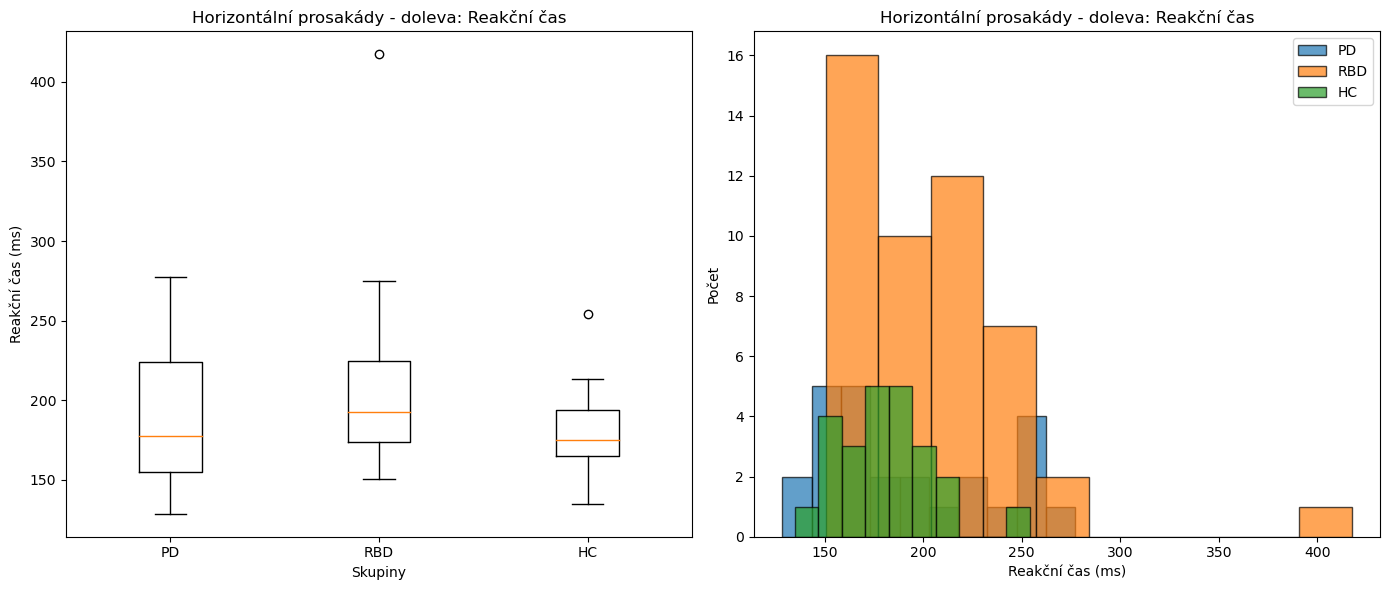


Vizualizácia pre parameter: Průměrná rychlost


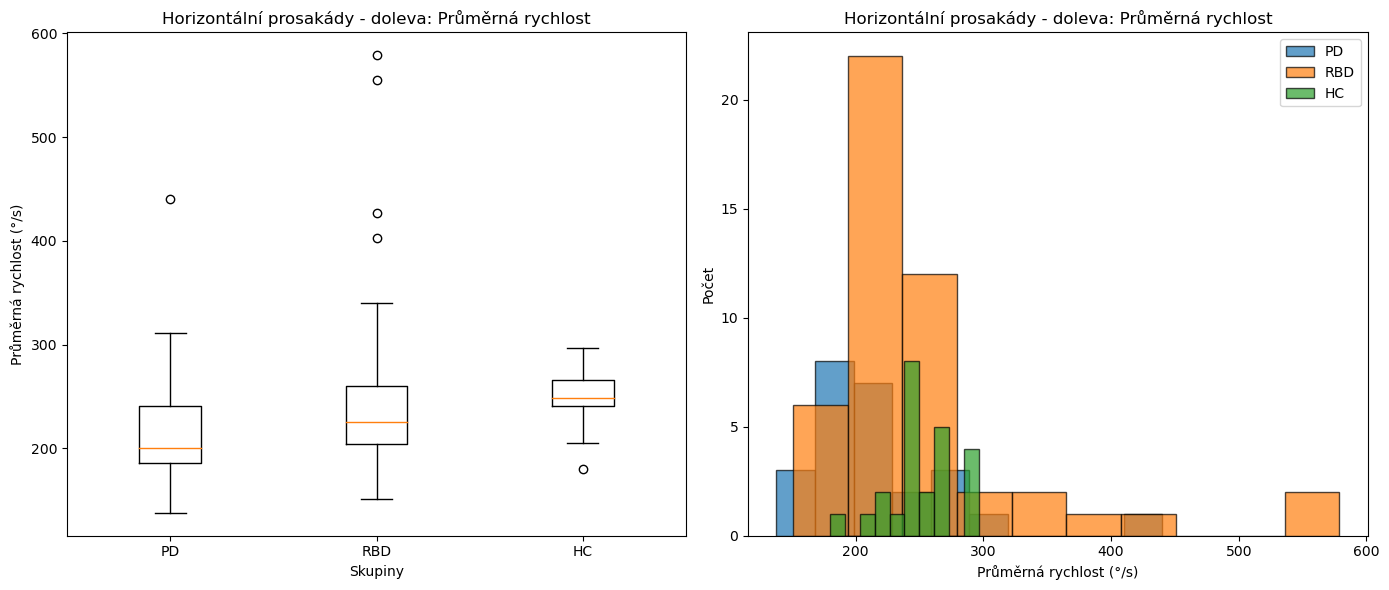


Vizualizácia pre parameter: Maximální rychlost


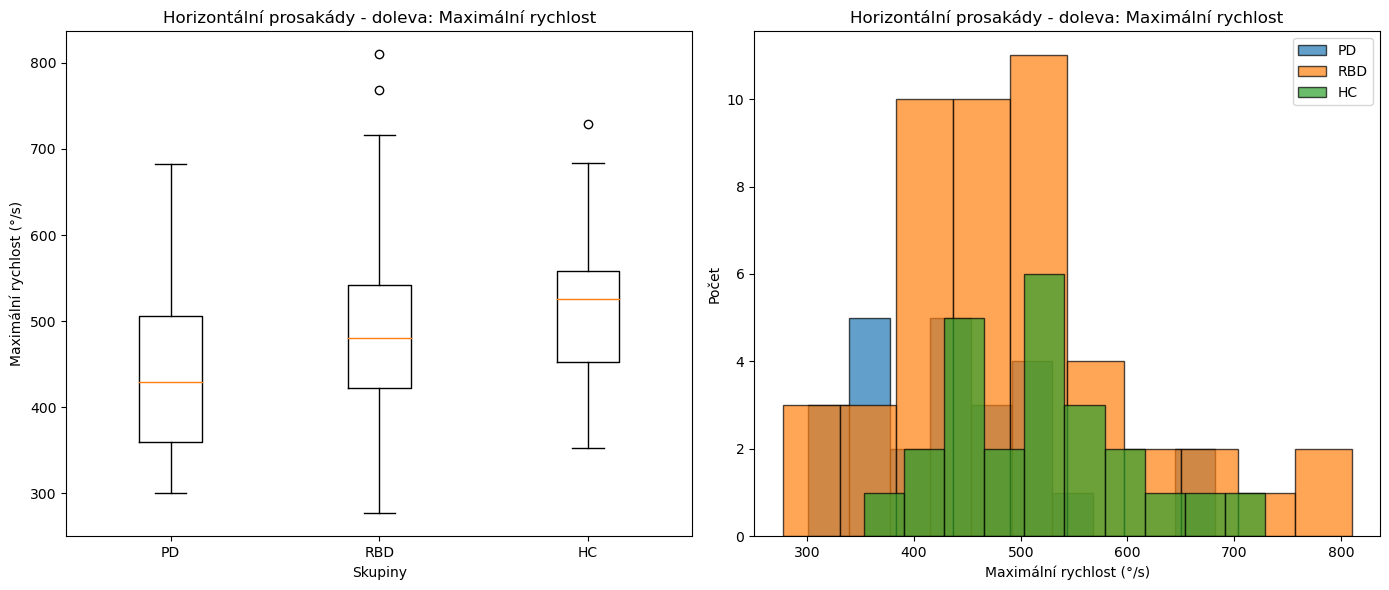


Vizualizácia pre parameter: Zesílení


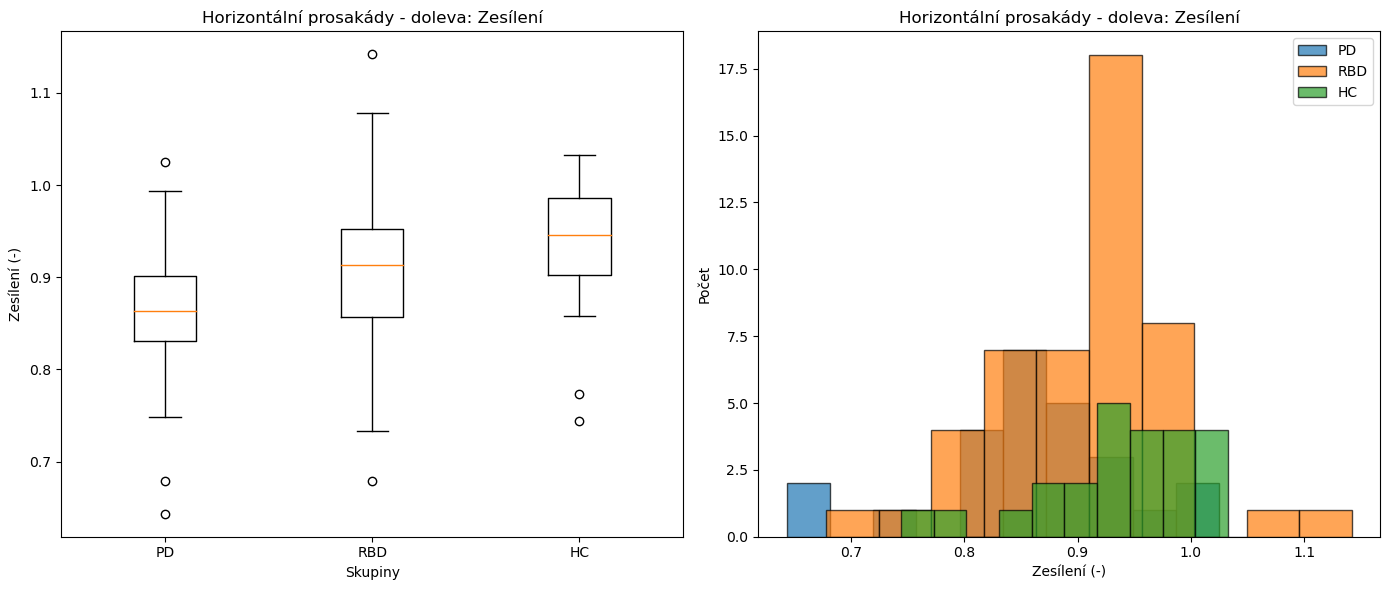


==== Testy pre parameter: Reakční čas ====
Shapiro-Wilk test normálnosti:
  PD: p=5.0090e-02
  RBD: p=8.0566e-07
  HC: p=3.2751e-01
Levene test homogenity variancií: Stat=2.0402, p=1.3572e-01
Kruskal-Wallis: Stat=5.4303, p=6.6195e-02

==== Testy pre parameter: Průměrná rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=8.5899e-04
  RBD: p=8.0267e-08
  HC: p=4.9964e-01
Levene test homogenity variancií: Stat=2.2786, p=1.0806e-01
Kruskal-Wallis: Stat=11.0889, p=3.9092e-03

Post-hoc test (Dunnov test):
           HC        PD       RBD
HC   1.000000  0.002608  0.169654
PD   0.002608  1.000000  0.162590
RBD  0.169654  0.162590  1.000000

==== Testy pre parameter: Maximální rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=1.1291e-01
  RBD: p=8.4596e-02
  HC: p=7.2460e-01
Levene test homogenity variancií: Stat=0.5352, p=5.8734e-01
ANOVA: Stat=3.7596, p=2.6870e-02

Post-hoc test (Tukey HSD):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower   

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Načítanie údajov zo súboru
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku


data = data.iloc[4:102, [0, 12, 13, 14, 15]] 
data.columns = ['Skupina', 'Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']  # Pre lepšiu čitateľnosť

# Kontrola a konverzia číselných hodnôt
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Konverzia na čísla, NaN pre neplatné hodnoty

# Odstránenie riadkov s NaN hodnotami
data = data.dropna()

# Rozdelenie údajov na skupiny podľa riadkov
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28) sú PD
data.loc[29:76, 'Skupina'] = 'RBD' # Riadky 30–77 (indexy 29–76) sú RBD
data.loc[77:101, 'Skupina'] = 'HC' # Riadky 78–102 (indexy 77–101) sú HC

# Skupiny pre ďalšie analýzy
group_PD = data[data['Skupina'] == 'PD']
group_RBD = data[data['Skupina'] == 'RBD']
group_HC = data[data['Skupina'] == 'HC']

# Vizualizácia (Boxploty a histogramy)
print("\n==== Vizualizácia ====")
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:

    units = {'Reakční čas': 'ms', 
             'Průměrná rychlost': '°/s',
             'Maximální rychlost': '°/s',
             'Zesílení': '-'}
    
    print(f"\nVizualizácia pre parameter: {col}")

    # Hodnoty pre skupiny
    values_PD = group_PD[col].dropna()
    values_RBD = group_RBD[col].dropna()
    values_HC = group_HC[col].dropna()

    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot([values_PD, values_RBD, values_HC], labels=['PD', 'RBD', 'HC'])
    plt.title(f"Horizontální prosakády - doleva: {col}")
    plt.xlabel("Skupiny") 
    plt.ylabel(f"{col} ({units[col]})")

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(values_PD, bins=10, alpha=0.7, label='PD', edgecolor='k')
    plt.hist(values_RBD, bins=10, alpha=0.7, label='RBD', edgecolor='k')
    plt.hist(values_HC, bins=10, alpha=0.7, label='HC', edgecolor='k')
    plt.title(f"Horizontální prosakády - doleva: {col}")
    plt.xlabel(f"{col} ({units[col]})") 
    plt.ylabel("Počet")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overenie normality a homogenity variancií
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    print(f"\n==== Testy pre parameter: {col} ====")
    
    # Test normálnosti
    p_PD = shapiro(group_PD[col])[1]
    p_RBD = shapiro(group_RBD[col])[1]
    p_HC = shapiro(group_HC[col])[1]
    print(f"Shapiro-Wilk test normálnosti:")
    print(f"  PD: p={p_PD:.4e}")
    print(f"  RBD: p={p_RBD:.4e}")
    print(f"  HC: p={p_HC:.4e}")
    
    # Test homogenity variancií
    stat_homogeneity, p_homogeneity = levene(
        group_PD[col], group_RBD[col], group_HC[col]
    )
    print(f"Levene test homogenity variancií: Stat={stat_homogeneity:.4f}, p={p_homogeneity:.4e}")

    # Výber testu
    if p_PD > 0.05 and p_RBD > 0.05 and p_HC > 0.05 and p_homogeneity > 0.05:
        # Parametrický test (ANOVA)
        anova_stat, anova_p = f_oneway(group_PD[col], group_RBD[col], group_HC[col])
        print(f"ANOVA: Stat={anova_stat:.4f}, p={anova_p:.4e}")
        
        if anova_p < 0.05:
            # Post-hoc test (Tukey HSD)
            tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'])
            print("\nPost-hoc test (Tukey HSD):")
            print(tukey)
    else:
        # Neparametrický test (Kruskal-Wallis)
        kruskal_stat, kruskal_p = kruskal(
            group_PD[col], group_RBD[col], group_HC[col]
        )
        print(f"Kruskal-Wallis: Stat={kruskal_stat:.4f}, p={kruskal_p:.4e}")
        
        if kruskal_p < 0.05:
            # Post-hoc test (Dunnov test)
            dunn = posthoc_dunn(data, val_col=col, group_col='Skupina', p_adjust='bonferroni')
            print("\nPost-hoc test (Dunnov test):")
            print(dunn)

####################################
#   VERTIKÁLNÍ PROSAKÁDY - NAHORU  #
####################################


==== Vizualizácia ====

Vizualizácia pre parameter: Reakční čas


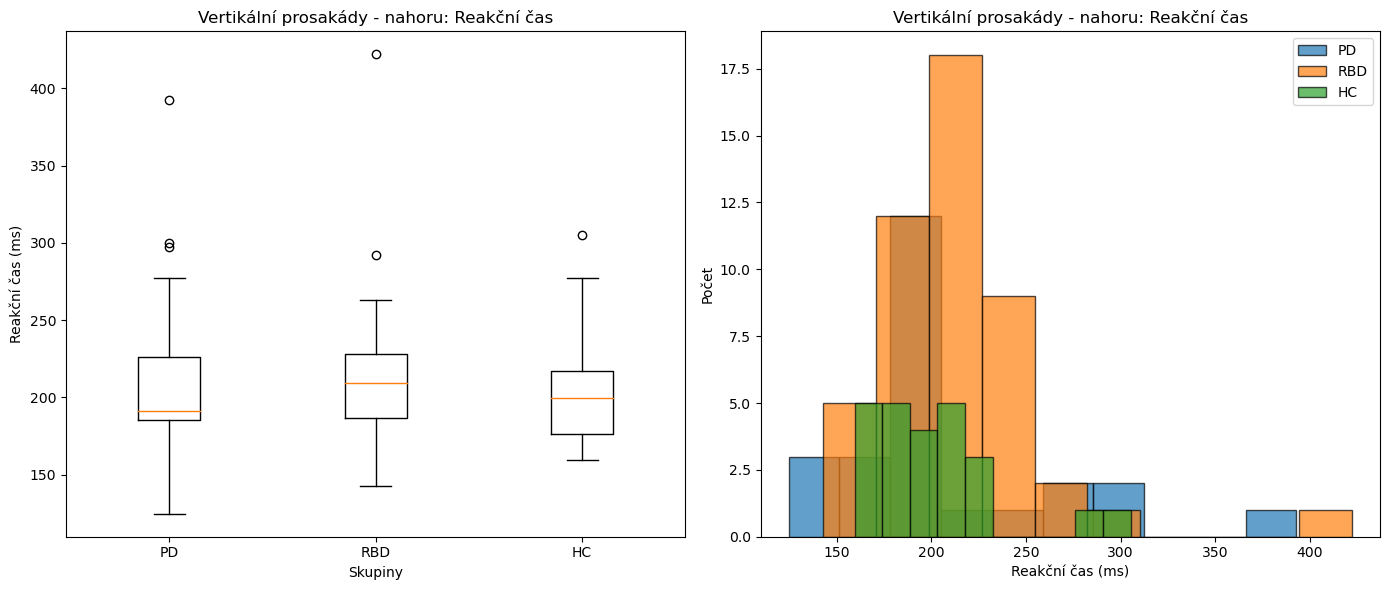


Vizualizácia pre parameter: Průměrná rychlost


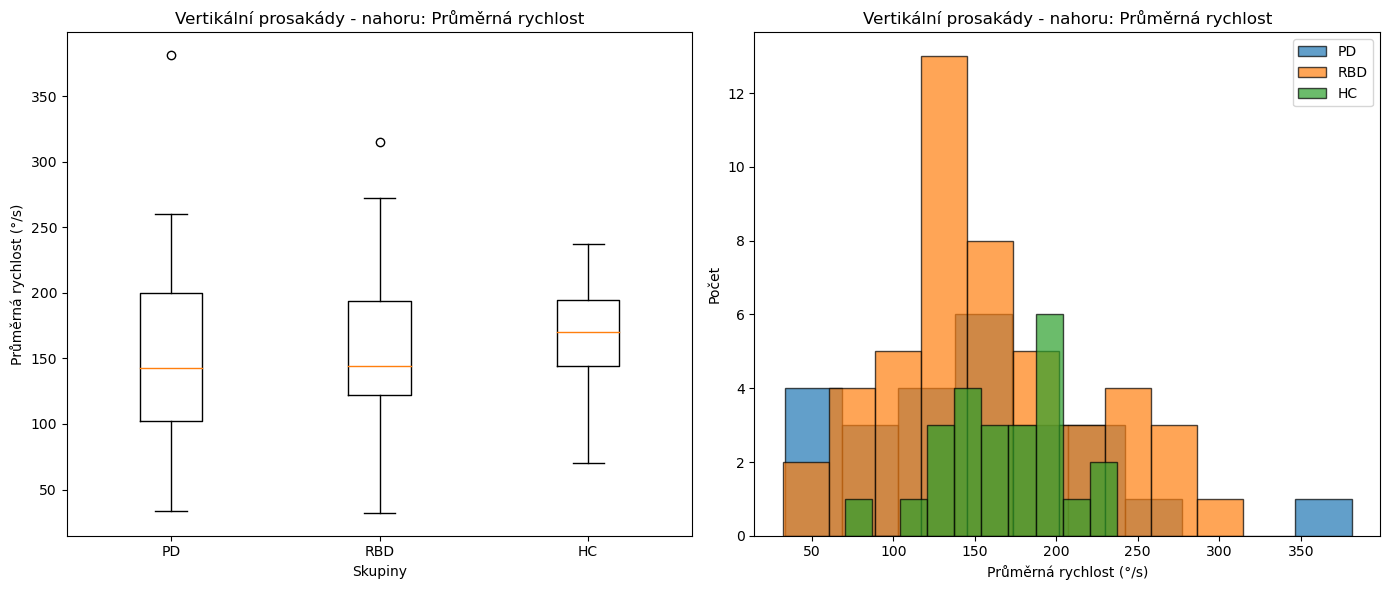


Vizualizácia pre parameter: Maximální rychlost


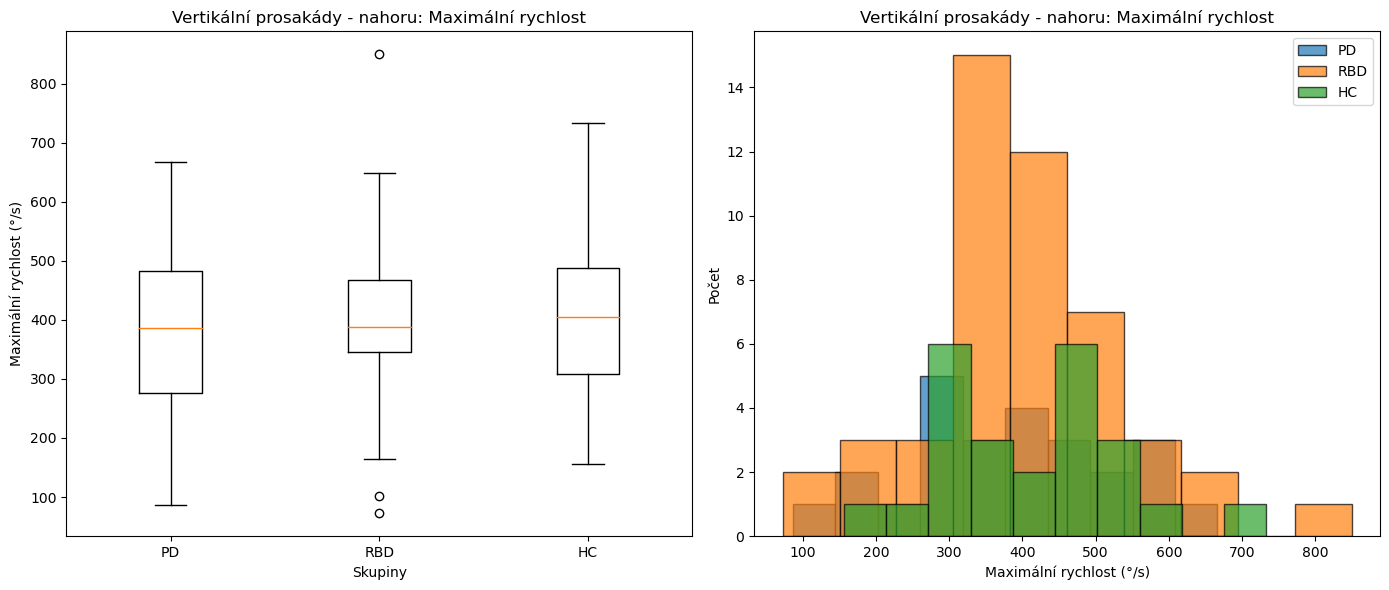


Vizualizácia pre parameter: Zesílení


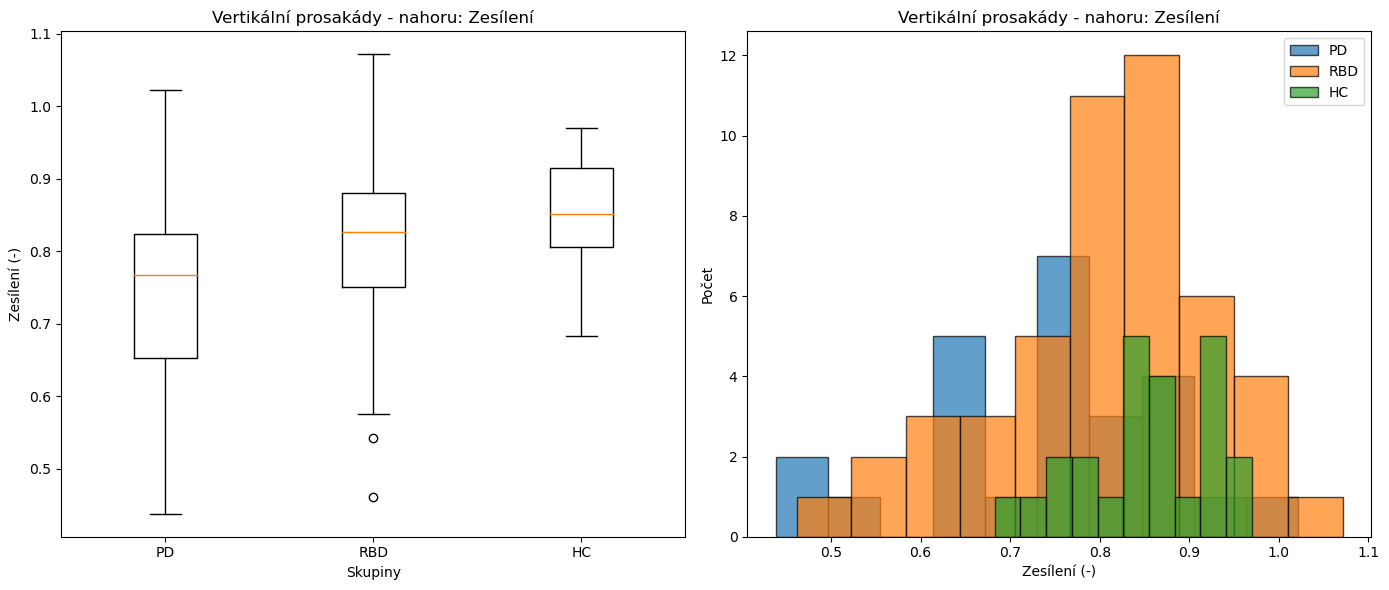


==== Testy pre parameter: Reakční čas ====
Shapiro-Wilk test normálnosti:
  PD: p=3.0310e-03
  RBD: p=7.4735e-06
  HC: p=6.5351e-03
Levene test homogenity variancií: Stat=0.9395, p=3.9446e-01
Kruskal-Wallis: Stat=2.2995, p=3.1672e-01

==== Testy pre parameter: Průměrná rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=1.4742e-01
  RBD: p=4.4375e-01
  HC: p=7.8424e-01
Levene test homogenity variancií: Stat=2.5915, p=8.0253e-02
ANOVA: Stat=0.3726, p=6.8995e-01

==== Testy pre parameter: Maximální rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=9.7839e-01
  RBD: p=1.7564e-01
  HC: p=4.8904e-01
Levene test homogenity variancií: Stat=0.3237, p=7.2430e-01
ANOVA: Stat=0.2985, p=7.4266e-01

==== Testy pre parameter: Zesílení ====
Shapiro-Wilk test normálnosti:
  PD: p=6.5906e-01
  RBD: p=7.6151e-02
  HC: p=6.7664e-01
Levene test homogenity variancií: Stat=2.5952, p=7.9973e-02
ANOVA: Stat=4.8814, p=9.6170e-03

Post-hoc test (Tukey HSD):
Multiple Comparison of Means - Tukey HSD, FWER=0.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Načítanie údajov zo súboru
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku


data = data.iloc[4:102, [0, 16, 17, 18, 19]] 
data.columns = ['Skupina', 'Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']  # Pre lepšiu čitateľnosť

# Kontrola a konverzia číselných hodnôt
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Konverzia na čísla, NaN pre neplatné hodnoty

# Odstránenie riadkov s NaN hodnotami
data = data.dropna()

# Rozdelenie údajov na skupiny podľa riadkov
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28) sú PD
data.loc[29:76, 'Skupina'] = 'RBD' # Riadky 30–77 (indexy 29–76) sú RBD
data.loc[77:101, 'Skupina'] = 'HC' # Riadky 78–102 (indexy 77–101) sú HC

# Skupiny pre ďalšie analýzy
group_PD = data[data['Skupina'] == 'PD']
group_RBD = data[data['Skupina'] == 'RBD']
group_HC = data[data['Skupina'] == 'HC']

# Vizualizácia (Boxploty a histogramy)
print("\n==== Vizualizácia ====")
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:

    units = {'Reakční čas': 'ms', 
             'Průměrná rychlost': '°/s',
             'Maximální rychlost': '°/s',
             'Zesílení': '-'}
    
    print(f"\nVizualizácia pre parameter: {col}")

    # Hodnoty pre skupiny
    values_PD = group_PD[col].dropna()
    values_RBD = group_RBD[col].dropna()
    values_HC = group_HC[col].dropna()

    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot([values_PD, values_RBD, values_HC], labels=['PD', 'RBD', 'HC'])
    plt.title(f"Vertikální prosakády - nahoru: {col}")
    plt.xlabel("Skupiny") 
    plt.ylabel(f"{col} ({units[col]})")

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(values_PD, bins=10, alpha=0.7, label='PD', edgecolor='k')
    plt.hist(values_RBD, bins=10, alpha=0.7, label='RBD', edgecolor='k')
    plt.hist(values_HC, bins=10, alpha=0.7, label='HC', edgecolor='k')
    plt.title(f"Vertikální prosakády - nahoru: {col}")
    plt.xlabel(f"{col} ({units[col]})") 
    plt.ylabel("Počet")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overenie normality a homogenity variancií
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    print(f"\n==== Testy pre parameter: {col} ====")
    
    # Test normálnosti
    p_PD = shapiro(group_PD[col])[1]
    p_RBD = shapiro(group_RBD[col])[1]
    p_HC = shapiro(group_HC[col])[1]
    print(f"Shapiro-Wilk test normálnosti:")
    print(f"  PD: p={p_PD:.4e}")
    print(f"  RBD: p={p_RBD:.4e}")
    print(f"  HC: p={p_HC:.4e}")
    
    # Test homogenity variancií
    stat_homogeneity, p_homogeneity = levene(
        group_PD[col], group_RBD[col], group_HC[col]
    )
    print(f"Levene test homogenity variancií: Stat={stat_homogeneity:.4f}, p={p_homogeneity:.4e}")

    # Výber testu
    if p_PD > 0.05 and p_RBD > 0.05 and p_HC > 0.05 and p_homogeneity > 0.05:
        # Parametrický test (ANOVA)
        anova_stat, anova_p = f_oneway(group_PD[col], group_RBD[col], group_HC[col])
        print(f"ANOVA: Stat={anova_stat:.4f}, p={anova_p:.4e}")
        
        if anova_p < 0.05:
            # Post-hoc test (Tukey HSD)
            tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'])
            print("\nPost-hoc test (Tukey HSD):")
            print(tukey)
    else:
        # Neparametrický test (Kruskal-Wallis)
        kruskal_stat, kruskal_p = kruskal(
            group_PD[col], group_RBD[col], group_HC[col]
        )
        print(f"Kruskal-Wallis: Stat={kruskal_stat:.4f}, p={kruskal_p:.4e}")
        
        if kruskal_p < 0.05:
            # Post-hoc test (Dunnov test)
            dunn = posthoc_dunn(data, val_col=col, group_col='Skupina', p_adjust='bonferroni')
            print("\nPost-hoc test (Dunnov test):")
            print(dunn)

##################################
#   VERTIKÁLNÍ PROSAKÁDY - DOLŮ  #
##################################


==== Vizualizácia ====

Vizualizácia pre parameter: Reakční čas


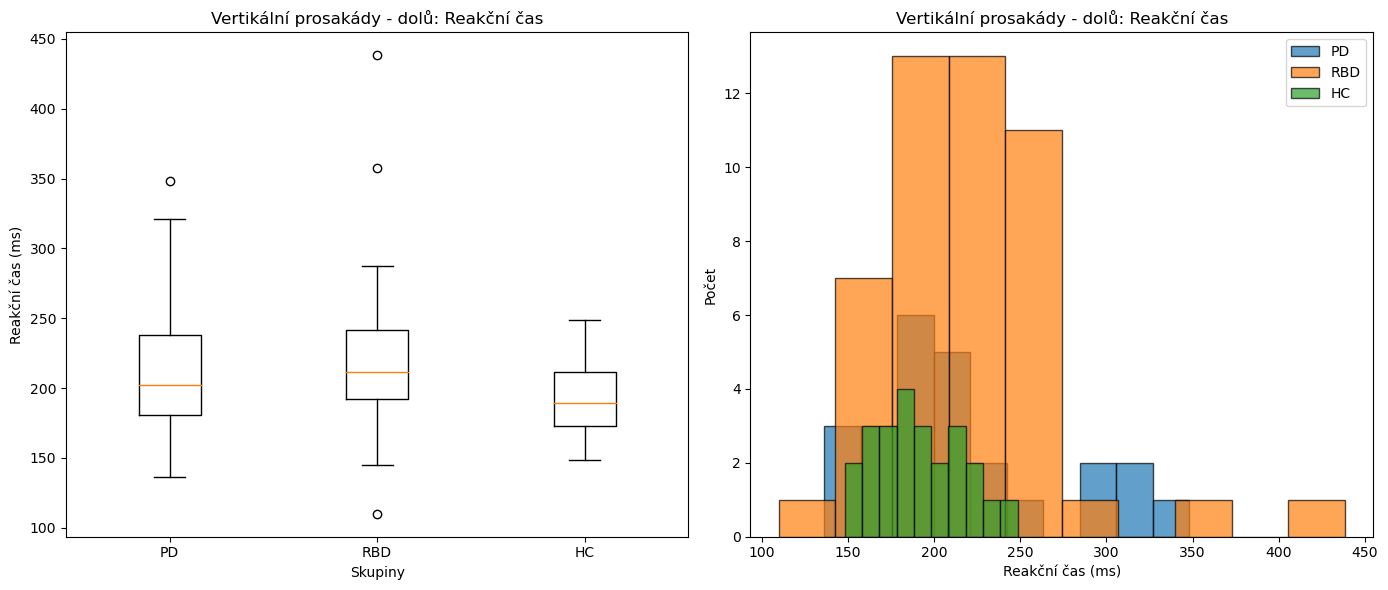


Vizualizácia pre parameter: Průměrná rychlost


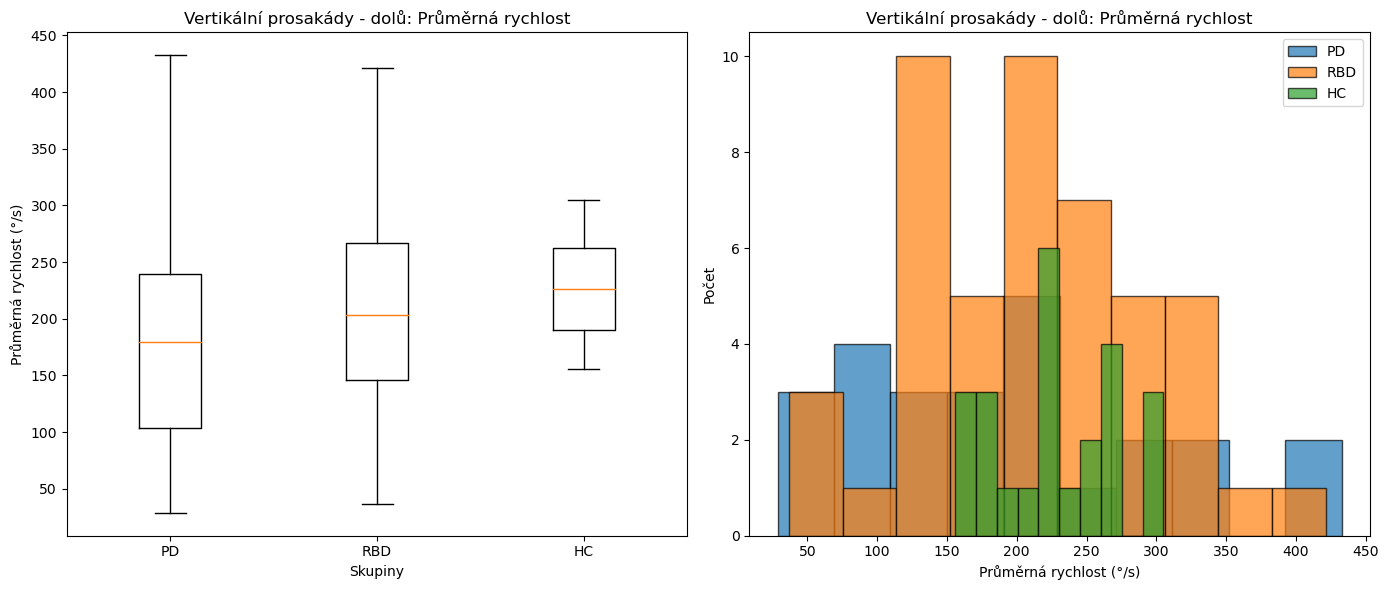


Vizualizácia pre parameter: Maximální rychlost


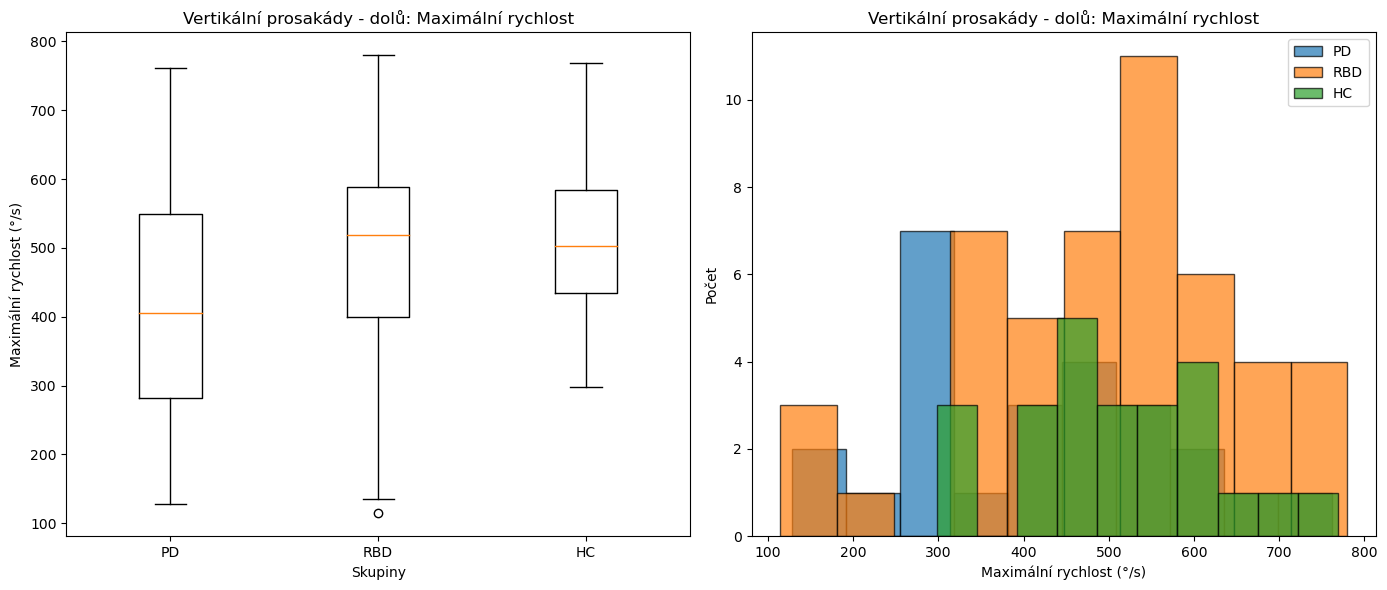


Vizualizácia pre parameter: Zesílení


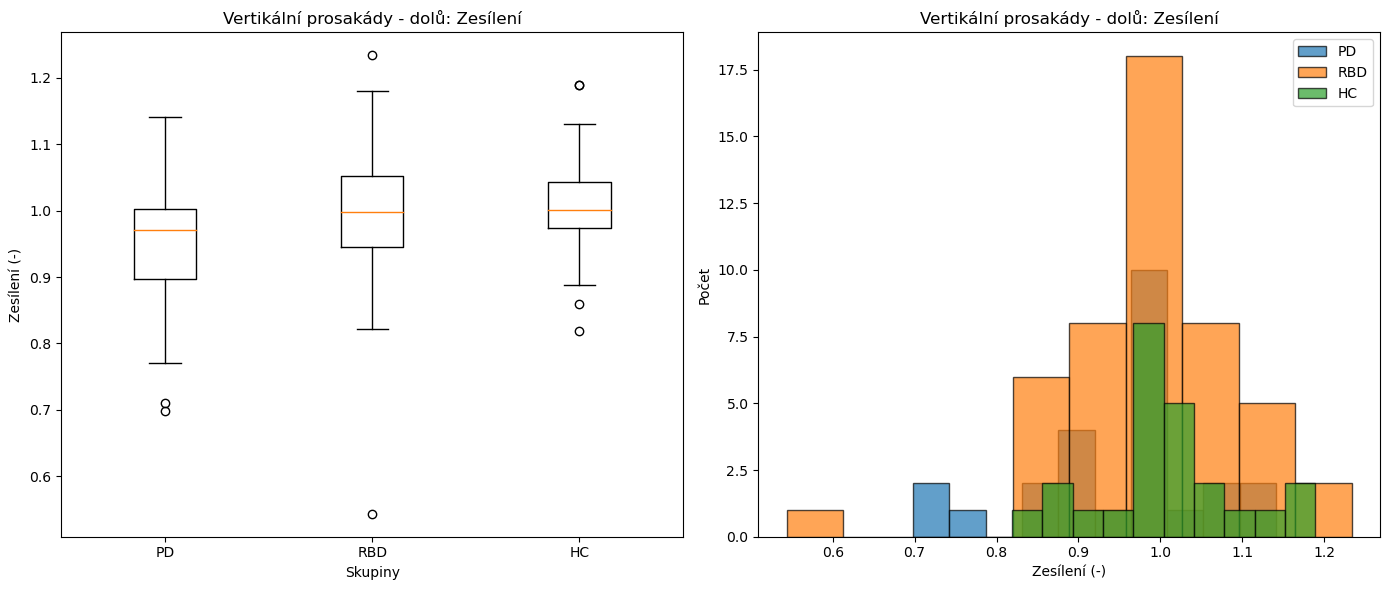


==== Testy pre parameter: Reakční čas ====
Shapiro-Wilk test normálnosti:
  PD: p=2.7165e-02
  RBD: p=1.7981e-05
  HC: p=9.0646e-01
Levene test homogenity variancií: Stat=2.3112, p=1.0475e-01
Kruskal-Wallis: Stat=6.0795, p=4.7848e-02

Post-hoc test (Dunnov test):
           HC        PD       RBD
HC   1.000000  0.410413  0.041118
PD   0.410413  1.000000  1.000000
RBD  0.041118  1.000000  1.000000

==== Testy pre parameter: Průměrná rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=3.7628e-01
  RBD: p=8.3637e-01
  HC: p=3.9332e-01
Levene test homogenity variancií: Stat=6.3319, p=2.6315e-03
Kruskal-Wallis: Stat=3.2880, p=1.9321e-01

==== Testy pre parameter: Maximální rychlost ====
Shapiro-Wilk test normálnosti:
  PD: p=7.3118e-01
  RBD: p=1.2230e-01
  HC: p=8.7685e-01
Levene test homogenity variancií: Stat=1.3790, p=2.5688e-01
ANOVA: Stat=3.1249, p=4.8540e-02

Post-hoc test (Tukey HSD):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Načítanie údajov zo súboru
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku


data = data.iloc[4:102, [0, 20, 21, 22, 23]] 
data.columns = ['Skupina', 'Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']  # Pre lepšiu čitateľnosť

# Kontrola a konverzia číselných hodnôt
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Konverzia na čísla, NaN pre neplatné hodnoty

# Odstránenie riadkov s NaN hodnotami
data = data.dropna()

# Rozdelenie údajov na skupiny podľa riadkov
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28) sú PD
data.loc[29:76, 'Skupina'] = 'RBD' # Riadky 30–77 (indexy 29–76) sú RBD
data.loc[77:101, 'Skupina'] = 'HC' # Riadky 78–102 (indexy 77–101) sú HC

# Skupiny pre ďalšie analýzy
group_PD = data[data['Skupina'] == 'PD']
group_RBD = data[data['Skupina'] == 'RBD']
group_HC = data[data['Skupina'] == 'HC']

# Vizualizácia (Boxploty a histogramy)
print("\n==== Vizualizácia ====")
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:

    units = {'Reakční čas': 'ms', 
             'Průměrná rychlost': '°/s',
             'Maximální rychlost': '°/s',
             'Zesílení': '-'}
    
    print(f"\nVizualizácia pre parameter: {col}")

    # Hodnoty pre skupiny
    values_PD = group_PD[col].dropna()
    values_RBD = group_RBD[col].dropna()
    values_HC = group_HC[col].dropna()

    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot([values_PD, values_RBD, values_HC], labels=['PD', 'RBD', 'HC'])
    plt.title(f"Vertikální prosakády - dolů: {col}")
    plt.xlabel("Skupiny") 
    plt.ylabel(f"{col} ({units[col]})")

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(values_PD, bins=10, alpha=0.7, label='PD', edgecolor='k')
    plt.hist(values_RBD, bins=10, alpha=0.7, label='RBD', edgecolor='k')
    plt.hist(values_HC, bins=10, alpha=0.7, label='HC', edgecolor='k')
    plt.title(f"Vertikální prosakády - dolů: {col}")
    plt.xlabel(f"{col} ({units[col]})") 
    plt.ylabel("Počet")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overenie normality a homogenity variancií
for col in ['Reakční čas', 'Průměrná rychlost', 'Maximální rychlost','Zesílení']:
    print(f"\n==== Testy pre parameter: {col} ====")
    
    # Test normálnosti
    p_PD = shapiro(group_PD[col])[1]
    p_RBD = shapiro(group_RBD[col])[1]
    p_HC = shapiro(group_HC[col])[1]
    print(f"Shapiro-Wilk test normálnosti:")
    print(f"  PD: p={p_PD:.4e}")
    print(f"  RBD: p={p_RBD:.4e}")
    print(f"  HC: p={p_HC:.4e}")
    
    # Test homogenity variancií
    stat_homogeneity, p_homogeneity = levene(
        group_PD[col], group_RBD[col], group_HC[col]
    )
    print(f"Levene test homogenity variancií: Stat={stat_homogeneity:.4f}, p={p_homogeneity:.4e}")

    # Výber testu
    if p_PD > 0.05 and p_RBD > 0.05 and p_HC > 0.05 and p_homogeneity > 0.05:
        # Parametrický test (ANOVA)
        anova_stat, anova_p = f_oneway(group_PD[col], group_RBD[col], group_HC[col])
        print(f"ANOVA: Stat={anova_stat:.4f}, p={anova_p:.4e}")
        
        if anova_p < 0.05:
            # Post-hoc test (Tukey HSD)
            tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'])
            print("\nPost-hoc test (Tukey HSD):")
            print(tukey)
    else:
        # Neparametrický test (Kruskal-Wallis)
        kruskal_stat, kruskal_p = kruskal(
            group_PD[col], group_RBD[col], group_HC[col]
        )
        print(f"Kruskal-Wallis: Stat={kruskal_stat:.4f}, p={kruskal_p:.4e}")
        
        if kruskal_p < 0.05:
            # Post-hoc test (Dunnov test)
            dunn = posthoc_dunn(data, val_col=col, group_col='Skupina', p_adjust='bonferroni')
            print("\nPost-hoc test (Dunnov test):")
            print(dunn)

PCA & MANOVA (Horizontální antisakády a Horizontální prosakády (doprava a doľava))


==== MANOVA na PCA komponentoch ====
                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.8976 2.0000 93.0000  5.3025 0.0066
          Pillai's trace 0.1024 2.0000 93.0000  5.3025 0.0066
  Hotelling-Lawley trace 0.1140 2.0000 93.0000  5.3025 0.0066
     Roy's greatest root 0.1140 2.0000 93.0000  5.3025 0.0066
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        Skupina         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8158 4.0000 186.0000  4.9831 0.0008
         Pillai's trace 0.1921 4.0000 188.0000  4.

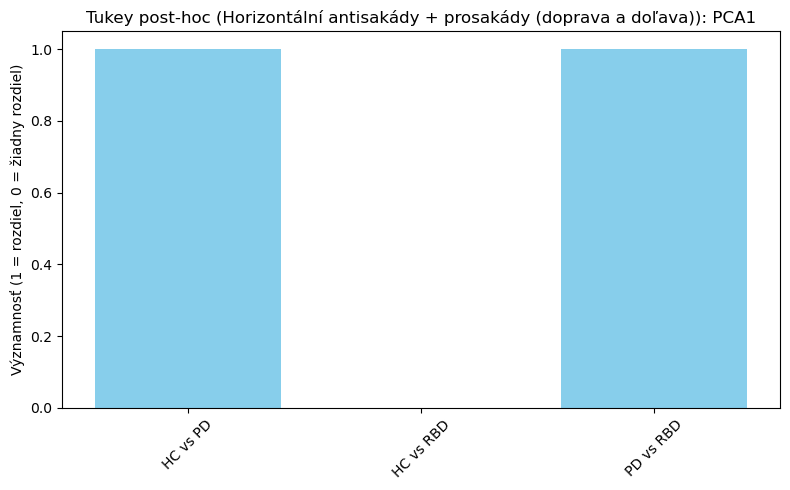


Post-hoc analýza pre komponentu: PCA2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC     PD   0.9919 0.0313  0.0725 1.9114   True
    HC    RBD   1.1858  0.002  0.3814 1.9901   True
    PD    RBD   0.1938 0.8303 -0.5998 0.9874  False
---------------------------------------------------


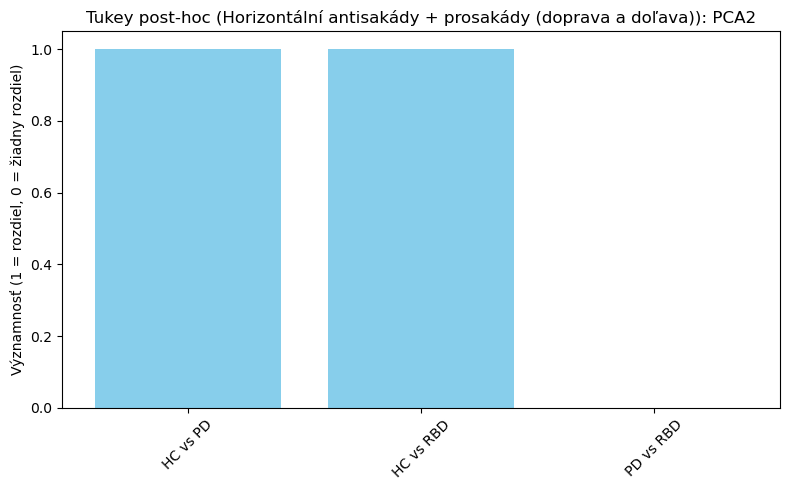

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.multivariate.manova import MANOVA

# 1. Načítanie dát
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku

# 2. Výber relevantných stĺpcov a riadkov
data = data.iloc[4:102, [0, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15]]  # Skupiny (0), Horizontálne antisakády (5-6), Prosakády (9-16)
data.columns = ['Skupina', 'Horizontální_Reakční_čas', 'Horizontální_Chyba',
                'Doprava_Reakční_čas', 'Doprava_Průměrná_rychlost', 'Doprava_Maximální_rychlost', 'Doprava_Zesílení',
                'Doleva_Reakční_čas', 'Doleva_Průměrná_rychlost', 'Doleva_Maximální_rychlost', 'Doleva_Zesílení']

# 3. Rozdelenie údajov na skupiny
data['Skupina'] = None
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28)
data.loc[29:76, 'Skupina'] = 'RBD'  # Riadky 30–77 (indexy 29–76)
data.loc[77:101, 'Skupina'] = 'HC'  # Riadky 78–102 (indexy 77–101)

# 4. Odstránenie chýbajúcich hodnôt
data = data.dropna()

# 5. PCA redukcia
# Výber numerických premenných
numerical_columns = ['Horizontální_Reakční_čas', 'Horizontální_Chyba',
                     'Doprava_Reakční_čas', 'Doprava_Průměrná_rychlost', 'Doprava_Maximální_rychlost', 'Doprava_Zesílení',
                     'Doleva_Reakční_čas', 'Doleva_Průměrná_rychlost', 'Doleva_Maximální_rychlost', 'Doleva_Zesílení']

# Škálovanie dát
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# PCA redukcia (zníženie na 2 hlavné komponenty)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Pridanie PCA komponentov do dát
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# 6. MANOVA test na PCA komponentoch
print("\n==== MANOVA na PCA komponentoch ====")
manova_model = MANOVA.from_formula('PCA1 + PCA2 ~ Skupina', data=data)
manova_results = manova_model.mv_test()
print(manova_results)

# 7. Interpretácia výsledkov
# Skontrolujeme tabuľku s výsledkami
print("\n==== Výsledky MANOVA ====")
print(manova_results)

# Extrakcia Wilksovej lambda a p-hodnoty
results_table = manova_results.results['Skupina']['stat']
print("\n==== Wilksova lambda ====")
print(results_table)

# Ak sú hodnoty dostupné v tabuľkovej forme
p_value = results_table.iloc[0, -1]  # P-hodnota z posledného stĺpca
print(f"P-hodnota: {p_value}")

if p_value < 0.05:
    print("\nMANOVA ukázala významné rozdiely medzi skupinami (p < 0.05).")
else:
    print("\nMANOVA nezistila významné rozdiely medzi skupinami (p ≥ 0.05).")

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# 8. Post-hoc analýza
print("\n==== Post-hoc analýza ====")

# Iterácia cez PCA komponenty
for col in ['PCA1', 'PCA2']:
    print(f"\nPost-hoc analýza pre komponentu: {col}")
    
    # Tukeyho HSD test
    tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'], alpha=0.05)
    print(tukey)
    
    # Vizualizácia výsledkov
    tukey_results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    
    plt.figure(figsize=(8, 5))
    plt.bar(tukey_results['group1'] + " vs " + tukey_results['group2'], tukey_results['reject'], color='skyblue')
    plt.title(f"Tukey post-hoc (Horizontální antisakády + prosakády (doprava a doľava)): {col}")
    plt.ylabel("Významnosť (1 = rozdiel, 0 = žiadny rozdiel)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


PCA & MANOVA (Vertikální antisakády a Vertikální prosakády (nahoru a dolů))


==== MANOVA na PCA komponentoch ====
                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.9814 2.0000 93.0000  0.8805 0.4180
          Pillai's trace 0.0186 2.0000 93.0000  0.8805 0.4180
  Hotelling-Lawley trace 0.0189 2.0000 93.0000  0.8805 0.4180
     Roy's greatest root 0.0189 2.0000 93.0000  0.8805 0.4180
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        Skupina         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9408 4.0000 186.0000  1.4413 0.2220
         Pillai's trace 0.0601 4.0000 188.0000  1.

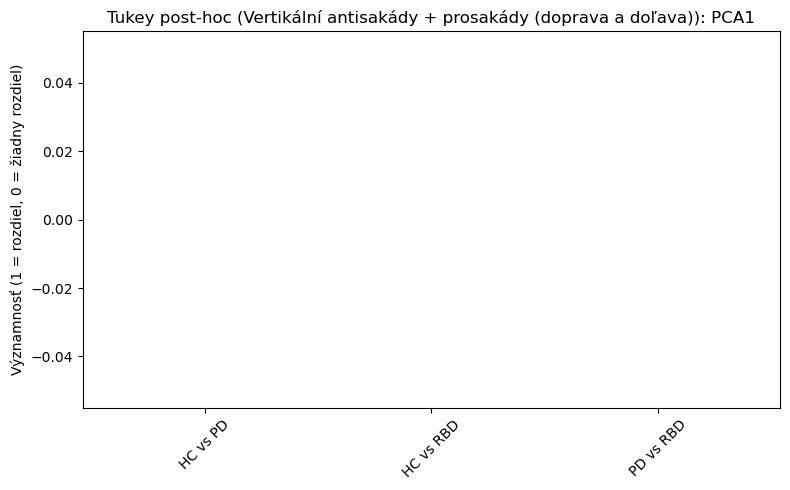


Post-hoc analýza pre komponentu: PCA2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC     PD  -0.2203 0.8527 -1.1953 0.7546  False
    HC    RBD   0.3678 0.5617 -0.4851 1.2207  False
    PD    RBD   0.5882 0.2242 -0.2533 1.4296  False
---------------------------------------------------


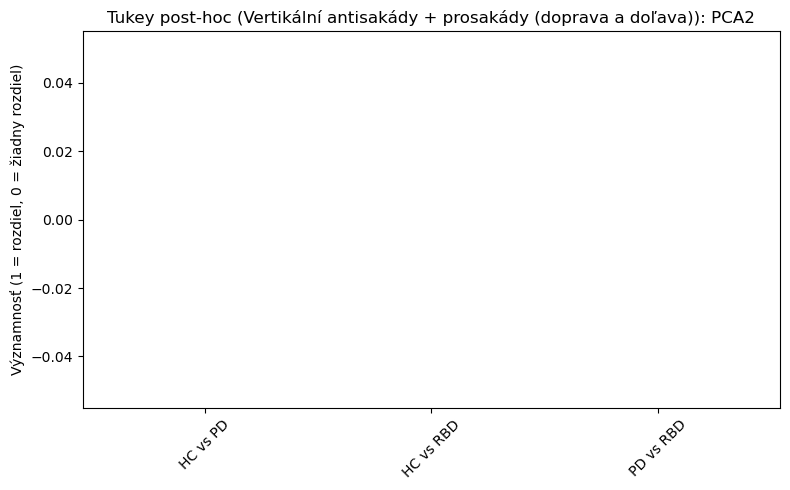

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.multivariate.manova import MANOVA

# 1. Načítanie dát
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku

# 2. Výber relevantných stĺpcov a riadkov
data = data.iloc[4:102, [0, 6, 7, 16, 17, 18, 19, 20, 21, 22, 23]]  # Skupiny (0), Vertikálne antisakády, Prosakády
data.columns = ['Skupina', 'Vertikální_Reakční_čas', 'Vertikální_Chyba',
                'Nahoru_Reakční_čas', 'Nahoru_Průměrná_rychlost', 'Nahoru_Maximální_rychlost', 'Nahoru_Zesílení',
                'Dolů_Reakční_čas', 'Dolů_Průměrná_rychlost', 'Dolů_Maximální_rychlost', 'Dolů_Zesílení']

# 3. Rozdelenie údajov na skupiny
data['Skupina'] = None
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28)
data.loc[29:76, 'Skupina'] = 'RBD'  # Riadky 30–77 (indexy 29–76)
data.loc[77:101, 'Skupina'] = 'HC'  # Riadky 78–102 (indexy 77–101)

# 4. Odstránenie chýbajúcich hodnôt
data = data.dropna()

# 5. PCA redukcia
# Výber numerických premenných
numerical_columns = ['Vertikální_Reakční_čas', 'Vertikální_Chyba',
                'Nahoru_Reakční_čas', 'Nahoru_Průměrná_rychlost', 'Nahoru_Maximální_rychlost', 'Nahoru_Zesílení',
                'Dolů_Reakční_čas', 'Dolů_Průměrná_rychlost', 'Dolů_Maximální_rychlost', 'Dolů_Zesílení']

# Škálovanie dát
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# PCA redukcia (zníženie na 2 hlavné komponenty)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Pridanie PCA komponentov do dát
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# 6. MANOVA test na PCA komponentoch
print("\n==== MANOVA na PCA komponentoch ====")
manova_model = MANOVA.from_formula('PCA1 + PCA2 ~ Skupina', data=data)
manova_results = manova_model.mv_test()
print(manova_results)

# 7. Interpretácia výsledkov
# Skontrolujeme tabuľku s výsledkami
print("\n==== Výsledky MANOVA ====")
print(manova_results)

# Extrakcia Wilksovej lambda a p-hodnoty
results_table = manova_results.results['Skupina']['stat']
print("\n==== Wilksova lambda ====")
print(results_table)

# Ak sú hodnoty dostupné v tabuľkovej forme
p_value = results_table.iloc[0, -1]  # P-hodnota z posledného stĺpca
print(f"P-hodnota: {p_value}")

if p_value < 0.05:
    print("\nMANOVA ukázala významné rozdiely medzi skupinami (p < 0.05).")
else:
    print("\nMANOVA nezistila významné rozdiely medzi skupinami (p ≥ 0.05).")

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# 8. Post-hoc analýza
print("\n==== Post-hoc analýza ====")

# Iterácia cez PCA komponenty
for col in ['PCA1', 'PCA2']:
    print(f"\nPost-hoc analýza pre komponentu: {col}")
    
    # Tukeyho HSD test
    tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'], alpha=0.05)
    print(tukey)
    
    # Vizualizácia výsledkov
    tukey_results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    
    plt.figure(figsize=(8, 5))
    plt.bar(tukey_results['group1'] + " vs " + tukey_results['group2'], tukey_results['reject'], color='skyblue')
    plt.title(f"Tukey post-hoc (Vertikální antisakády + prosakády (doprava a doľava)): {col}")
    plt.ylabel("Významnosť (1 = rozdiel, 0 = žiadny rozdiel)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


PCA & MANOVA (Věk a Reakční časy)


==== MANOVA na PCA komponentoch ====
                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.9639 2.0000 93.0000  1.7410 0.1810
          Pillai's trace 0.0361 2.0000 93.0000  1.7410 0.1810
  Hotelling-Lawley trace 0.0374 2.0000 93.0000  1.7410 0.1810
     Roy's greatest root 0.0374 2.0000 93.0000  1.7410 0.1810
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        Skupina         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8450 4.0000 186.0000  4.0842 0.0034
         Pillai's trace 0.1599 4.0000 188.0000  4.

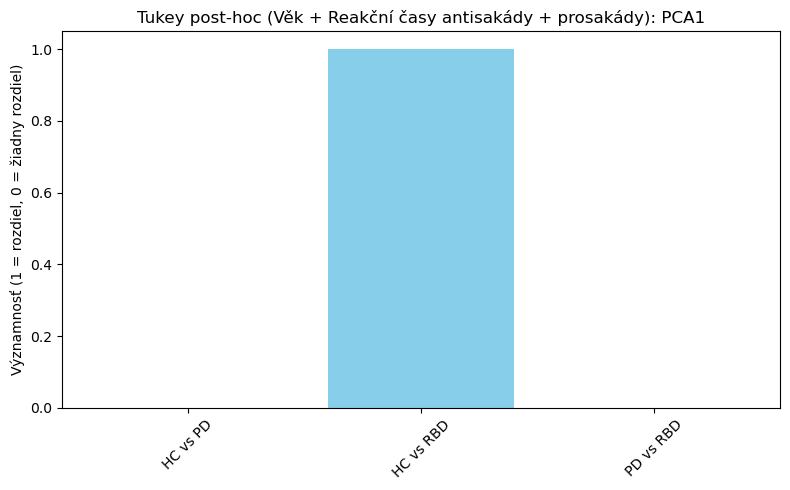


Post-hoc analýza pre komponentu: PCA2
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    HC     PD   0.5368  0.099 -0.0771  1.1506  False
    HC    RBD  -0.1535 0.7752 -0.6906  0.3835  False
    PD    RBD  -0.6903 0.0071 -1.2201 -0.1605   True
----------------------------------------------------


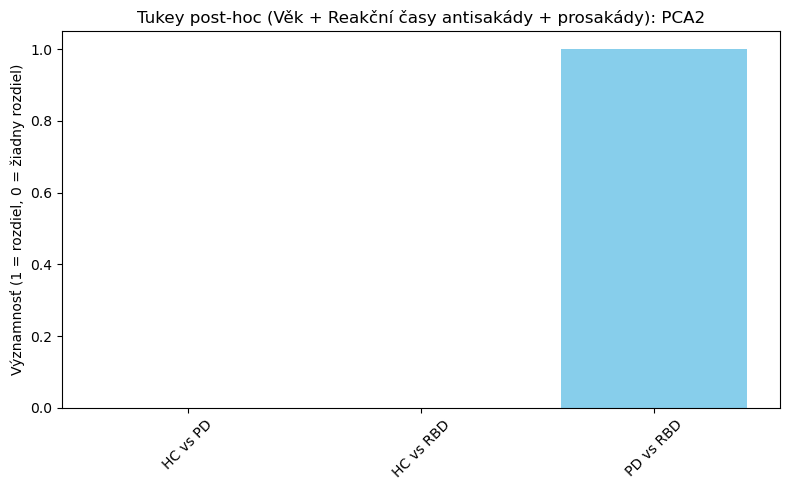

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.multivariate.manova import MANOVA

# 1. Načítanie dát
data = pd.read_csv("data.csv")  # Súbor je v rovnakom priečinku

# 2. Výber relevantných stĺpcov a riadkov
data = data.iloc[4:102, [0, 1, 4, 6, 8, 12, 16, 20]]  # Skupiny (0), Reakční časy
data.columns = ['Skupina', 'Věk', 'HA','VA', 'HP-doprava', 'HP-doleva', 'VP-nahoru','VP-dolů']

# 3. Rozdelenie údajov na skupiny
data['Skupina'] = None
data.loc[4:28, 'Skupina'] = 'PD'   # Riadky 5–29 (indexy 4–28)
data.loc[29:76, 'Skupina'] = 'RBD'  # Riadky 30–77 (indexy 29–76)
data.loc[77:101, 'Skupina'] = 'HC'  # Riadky 78–102 (indexy 77–101)

# 4. Odstránenie chýbajúcich hodnôt
data = data.dropna()

# 5. PCA redukcia
# Výber numerických premenných
numerical_columns = [ 'Věk', 'HA','VA', 'HP-doprava', 'HP-doleva', 'VP-nahoru','VP-dolů']

# Škálovanie dát
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# PCA redukcia (zníženie na 2 hlavné komponenty)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Pridanie PCA komponentov do dát
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# 6. MANOVA test na PCA komponentoch
print("\n==== MANOVA na PCA komponentoch ====")
manova_model = MANOVA.from_formula('PCA1 + PCA2 ~ Skupina', data=data)
manova_results = manova_model.mv_test()
print(manova_results)

# 7. Interpretácia výsledkov
# Skontrolujeme tabuľku s výsledkami
print("\n==== Výsledky MANOVA ====")
print(manova_results)

# Extrakcia Wilksovej lambda a p-hodnoty
results_table = manova_results.results['Skupina']['stat']
print("\n==== Wilksova lambda ====")
print(results_table)

# Ak sú hodnoty dostupné v tabuľkovej forme
p_value = results_table.iloc[0, -1]  # P-hodnota z posledného stĺpca
print(f"P-hodnota: {p_value}")

if p_value < 0.05:
    print("\nMANOVA ukázala významné rozdiely medzi skupinami (p < 0.05).")
else:
    print("\nMANOVA nezistila významné rozdiely medzi skupinami (p ≥ 0.05).")

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# 8. Post-hoc analýza
print("\n==== Post-hoc analýza ====")

# Iterácia cez PCA komponenty
for col in ['PCA1', 'PCA2']:
    print(f"\nPost-hoc analýza pre komponentu: {col}")
    
    # Tukeyho HSD test
    tukey = pairwise_tukeyhsd(endog=data[col], groups=data['Skupina'], alpha=0.05)
    print(tukey)
    
    # Vizualizácia výsledkov
    tukey_results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    
    plt.figure(figsize=(8, 5))
    plt.bar(tukey_results['group1'] + " vs " + tukey_results['group2'], tukey_results['reject'], color='skyblue')
    plt.title(f"Tukey post-hoc (Věk + Reakční časy antisakády + prosakády): {col}")
    plt.ylabel("Významnosť (1 = rozdiel, 0 = žiadny rozdiel)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()